<h1 style="text-align: center; color: navy;">Banking Resilience: Modeling Climate and Physical Risks</h1>
<h2 style="text-align: center; color: darkslategray;">In Collaboration with SQUARE MANAGEMENT</h2>

<div style="margin-top: 20px;">
    <p style="font-size: 16px; text-align: center;">
        <strong>AUTHOR:</strong>
    </p>
    <p style="text-align: center;">
        <span style="font-weight: bold; color: #007BFF;">Nasrallah MOHAMMI</span> | 
        <span style="font-style: italic; color: #6c757d;">Data Scientist & Analyst  </span>
    </p>

</div>


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import hvplot.pandas

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Project Overview : 

This project explores the intersection of climate risk and credit risk through a data-driven approach. The objective is to assess and quantify the impact of climate risks—both physical risks (e.g., natural disasters) and transition risks (e.g., economic adjustments to low-carbon policies)—on financial stability. By integrating these factors into risk modeling, we aim to contribute to the understanding and mitigation of climate-driven financial vulnerabilities.

## Objectives
**Integration of climate factors into traditional financial risk models :** The integration of climate data with credit risk datasets aims to create a comprehensive framework for evaluating the joint impact of physical and transition climate risks on bank loan portfolios. This approach enhances the accuracy and depth of risk evaluation by incorporating environmental factors into traditional financial risk models.

**Model Development :** Build predictive models to quantify risks using Python, focusing on key metrics like default probabilities and sectoral risk exposure.

## Workflow and steps 

- **Data Preparation :**
  - Data Quality Analysis
  - Data Quality Enhancement
  - Descriptive Statistics
  - Univariate Analysis
  - Multivariate Analysis

<p>
    
- **Modeling :**
  - Greenhouse Gas Emissions Estimation:
  - Feature Engineering and Selection:
  - Baseline Model Deployment:
  - Experiment with more complex algorithms:
  - Evaluate model performance using metrics such as ROC, Gini coefficient, sensitivity, specificity, and R-squared.

<p>
    
- **Model Validation:** 
  - Document performance metrics and validate the final model
 
## Data Sources

**Credit Data :**  Utilize the Lending Club dataset from Kaggle, which includes data on accepted and rejected loans from 2007 to 2018. This dataset contains detailed financial and demographic factors for approved loans and insights into the risk profiles of denied applications.

**Climate Data :** Leverage the EM-DAT database and additional resources to evaluate the impact of physical climate risks, including natural disasters like floods, hurricanes, and wildfires.


In [4]:
accepted_data = pd.read_csv("accepted_2007_to_2018Q4.csv")
rejected_data = pd.read_csv("rejected_2007_to_2018Q4.csv")

In [5]:
print(accepted_data.shape)
print(rejected_data.shape)

(2260701, 151)
(27648741, 9)


The accepted_data dataset has 2,260,701 rows and 151 columns, indicating detailed information for accepted loans.  
The rejected_data dataset has 27,648,741 rows and 9 columns, focusing on fewer attributes for rejected loans.

In [7]:
accepted_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,68476668,NaN,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,67275481,NaN,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,68466926,NaN,10000.0,10000.0,10000.0,36 months,6.49,306.45,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,68616873,NaN,8000.0,8000.0,8000.0,36 months,11.48,263.74,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
rejected_data.head(10)

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0
5,15000.0,2007-05-27,Trinfiniti,645.0,0%,105xx,NY,3 years,0.0
6,10000.0,2007-05-27,NOTIFYi Inc,693.0,10%,210xx,MD,< 1 year,0.0
7,3900.0,2007-05-27,For Justin.,700.0,10%,469xx,IN,2 years,0.0
8,3000.0,2007-05-28,title?,694.0,10%,808xx,CO,4 years,0.0
9,2500.0,2007-05-28,timgerst,573.0,11.76%,407xx,KY,4 years,0.0


In [9]:
rejected_data.columns

Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')

### Description of Variables in `rejected_data`:
The `rejected_data` dataset contains 9 variables, which we will describe in detail below. Since the `accepted_data` dataset has 151 variables, we will not describe all of them at this stage. Instead, we will explore and analyze some of the key variables during the data exploration phase.

- **Amount Requested**: The loan amount requested by the applicant.
- **Application Date**: The date the loan application was submitted.
- **Loan Title**: A short description or title provided by the applicant explaining the purpose of the loan.
- **Risk_Score**: The applicant's risk score (creditworthiness) used for evaluating the application.
- **Debt-To-Income Ratio**: The ratio of the applicant's total monthly debt payments to their monthly income, expressed as a percentage.
- **Zip Code**: The zip code of the applicant, providing geographic information.
- **State**: The state of residence of the applicant.
- **Employment Length**: The duration of the applicant's employment, typically provided in years (e.g., "4 years", "< 1 year").
- **Policy Code**: A code indicating the type of policy associated with the loan application, with "0" being the default value in most cases.

We will revisit the variables in `accepted_data` later during data exploration to identify key features relevant to our analysis.

In [11]:
accepted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [12]:
rejected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB



The `accepted_data` dataset includes 113 numerical and 38 categorical variable. In comparison, the `rejected_data` dataset has 3 numerical and 6 categorical variables.

In [14]:
accepted_data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [15]:
rejected_data.describe()

,Amount Requested,Risk_Score,Policy Code
count,2.764874e+07,9.151111e+06,2.764782e+07
mean,1.313324e+04,6.281721e+02,6.375113e-03
std,1.500964e+04,8.993679e+01,1.127368e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.800000e+03,5.910000e+02,0.000000e+00
50%,1.000000e+04,6.370000e+02,0.000000e+00
75%,2.000000e+04,6.750000e+02,0.000000e+00
max,1.400000e+06,9.900000e+02,2.000000e+00


# Data preparation

### Missing values

There are a lot of columns which have huge chunk of data missing. These columns are not necessary for our analysis. The following part will drop any columns where 20% or more data is missing, which means only columns whose number of non-null values is at least 80% of the total number of rows in the dataset will be retained.

In [19]:
def get_missing_value_stats(input_df):
    df_null = pd.DataFrame({
        'Missing Count': input_df.isnull().sum(),
        'Missing Percent': 100 * input_df.isnull().sum() / len(input_df),
        'Type': input_df.dtypes
    })
    missing_values = df_null[df_null['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False) 
    return missing_values

def get_value_stats(input_df):
    df_null = pd.DataFrame({
        '#Count': input_df.notna().sum(),
        '%Populated': 100 * input_df.notna().sum() / len(input_df),
        '#Unique Values':input_df.nunique(),
        'Most Common Value': input_df.mode().iloc[0],
        'Type': input_df.dtypes
    })

    missing_values = df_null[df_null['#Count'] > 0].sort_values(by='#Count', ascending=False)

    return missing_values


get_missing_value_stats(accepted_data)

,Missing Count,Missing Percent,Type
member_id,2260701,100.000000,float64
orig_projected_additional_accrued_interest,2252050,99.617331,float64
hardship_dpd,2249784,99.517097,float64
hardship_status,2249784,99.517097,object
deferral_term,2249784,99.517097,float64
...,...,...,...
out_prncp_inv,33,0.001460,float64
out_prncp,33,0.001460,float64
initial_list_status,33,0.001460,object
fico_range_high,33,0.001460,float64


In [20]:
accepted_data = accepted_data.dropna(axis=1, thresh=int(0.70*len(accepted_data)))
get_missing_value_stats(accepted_data)

,Missing Count,Missing Percent,Type
mths_since_recent_inq,295468,13.069751,float64
emp_title,167002,7.387178,object
num_tl_120dpd_2m,153690,6.798334,float64
emp_length,146940,6.499754,object
mo_sin_old_il_acct,139104,6.153136,float64
...,...,...,...
collection_recovery_fee,33,0.001460,float64
last_pymnt_amnt,33,0.001460,float64
last_fico_range_high,33,0.001460,float64
funded_amnt,33,0.001460,float64


Initially, the `accepted_data` dataset contained 151 variables. After removing columns with more than 20% missing values, the dataset was reduced to 91 variables. This step ensures that we retain only the most reliable and complete features for further analysis.  
60 variables were removed.


To identify the features that would have been accessible to potential investors, we review the LendingClub website and consult the Data Dictionary. We retain only those that would have been visible to investors when evaluating a loan. These include details from the loan application and additional features provided by LendingClub, such as the loan grade and interest rate, once the loan was approved. 

Note :  my understanding of the LendingClub investment process is based on publicly available information, as I am not an investor on the platform. In cases where it is unclear whether a feature was available to investors, I choose to exclude it from the analysis to ensure accuracy.


In [23]:
keep_list = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']

In [24]:

keep_list = [
    'addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 
    'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 
    'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 
    'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 
    'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 
    'term', 'title', 'total_acc', 'verification_status', 'zip_code'
]

accepted_data = accepted_data[keep_list]

print("Updated dataset shape:", accepted_data.shape)


Updated dataset shape: (2260701, 31)


We finally get to work with 31 variables only.

### Data Cleaning: Handling Missing Values
To handle missing values, we will:
- **Quantitative Variables**: Impute missing values using the median, as it is robust to outliers and provides a better representation of central tendency for skewed data.
- **Categorical Variables**: Impute missing values using the mode, as it represents the most frequent category in the data.

In [27]:
quantitative_cols = accepted_data.select_dtypes(include=['float64', 'int64']).columns
accepted_data[quantitative_cols] = accepted_data[quantitative_cols].fillna(accepted_data[quantitative_cols].median())

categorical_cols = accepted_data.select_dtypes(include=['object']).columns
accepted_data[categorical_cols] = accepted_data[categorical_cols].fillna(accepted_data[categorical_cols].mode().iloc[0])

### Outlier Detection and Removal Using the Percentile-Based Approach

To ensure data quality and robustness, I apply a **percentile-based method** for detecting and removing outliers. This approach identifies extreme values by trimming the top and bottom percentages of the data for each numerical variable. Specifically, we removed values below the 5th  percentile and above the 95th percentile, ensuring that only the most extreme 10% of data points were excluded. By retaining 90% of the data, this method minimizes the impact of extreme values while preserving the majority of the dataset for analysis.


In [29]:
def remove_outliers_percentile(dataframe, lower_percentile=0.05, upper_percentile=0.95, columns=None):
    if columns is None:
        columns = dataframe.select_dtypes(include=['float64', 'int64']).columns  # Default to all numerical columns
    
    for col in columns:
        lower_bound = dataframe[col].quantile(lower_percentile)
        upper_bound = dataframe[col].quantile(upper_percentile)
        dataframe = dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]
    
    dataframe.reset_index(drop=True, inplace=True)
    return dataframe

print("Dataset before removing outliers:", accepted_data.shape)

columns_to_filter = ['annual_inc', 'dti', 'open_acc', 'total_acc', 'revol_util', 'revol_bal']
accepted_data = remove_outliers_percentile(accepted_data, lower_percentile=0.05, upper_percentile=0.95, columns=columns_to_filter)

print("Dataset after removing outliers:", accepted_data.shape)


Dataset before removing outliers: (2260701, 31)
Dataset after removing outliers: (1238433, 31)


### Normalizing the dataset

In [31]:
from sklearn.preprocessing import MinMaxScaler
quantitative_cols = accepted_data.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
accepted_data[quantitative_cols] = scaler.fit_transform(accepted_data[quantitative_cols])

# Exploratory Data Analysis 

## Univariate Analysis 

### Loan Status Count

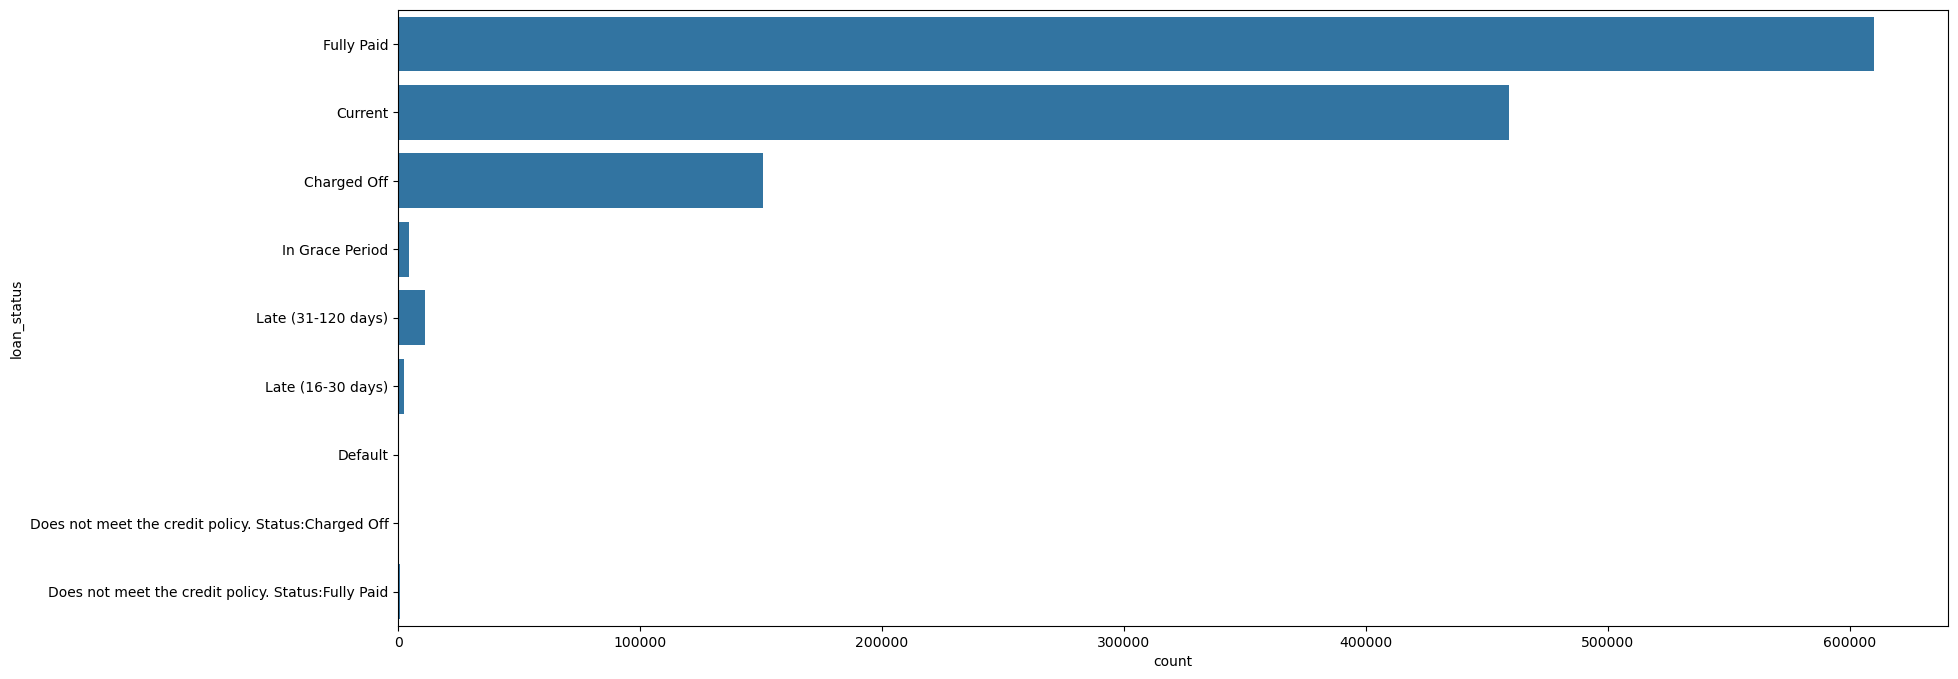

In [35]:
fig = plt.figure(figsize=(20,8))
sns.countplot(y='loan_status', data=accepted_data);

Fully paid are the highest followed by current and the charged off. Most of the loan accounts are either paid off or the payment is still in progress

In [37]:
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period",
            "Late (16-30 days)", "Late (31-120 days)"]
accepted_data['loan_condition_int'] = accepted_data['loan_status'].apply(lambda status: 1 if status in bad_loan else 0).astype(int)
accepted_data['loan_condition'] = np.where(accepted_data['loan_condition_int'] == 0, 'Good Loan', 'Bad Loan')

To simplify the analysis, we classified loans into two categories: **Good Loans** and **Bad Loans**. 
- **Bad Loans** include statuses such as "Charged Off", "Default", "In Grace Period", "Late (16-30 days)", and "Late (31-120 days)", as well as "Does not meet the credit policy. Status: Charged Off".
- **Good Loans** are all other loans, including fully paid and current loans.

A new column, `loan_condition_int`, was created where:
- `1` indicates a **Bad Loan**.
- `0` indicates a **Good Loan**.

Additionally, a descriptive column `loan_condition` was added for readability, labeling loans as either "Good Loan" or "Bad Loan" based on the numerical classification.

In [39]:
accepted_data['loan_condition'].value_counts()

loan_condition
Good Loan    1069969
Bad Loan      168464
Name: count, dtype: int64

In [40]:
accepted_data = accepted_data.drop(columns=['loan_condition_int','loan_status'])

### Mapping emp_length and region

- The `emp_length` column was converted into a numerical column, `emp_length_int`, by mapping employment durations to numeric values (e.g., "10+ years" to 10, "< 1 year" to 0.5, and "n/a" to 0).

- The `addr_state` column was mapped to a new `region` column, categorizing borrowers into five U.S. regions: West, SouthWest, SouthEast, MidWest, and NorthEast. This allows for regional analysis, as visualized in the bar chart below.

In [43]:
#emp_length
emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0.5,
    'n/a': 0
}
accepted_data['emp_length_int'] = accepted_data['emp_length'].map(emp_length_mapping)

# region
state_to_region = {
    'CA': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West', 'CO': 'West',
    'NV': 'West', 'AK': 'West', 'MT': 'West', 'HI': 'West', 'WY': 'West', 'ID': 'West',
    'AZ': 'SouthWest', 'TX': 'SouthWest', 'NM': 'SouthWest', 'OK': 'SouthWest',
    'GA': 'SouthEast', 'NC': 'SouthEast', 'VA': 'SouthEast', 'FL': 'SouthEast', 'KY': 'SouthEast',
    'SC': 'SouthEast', 'LA': 'SouthEast', 'AL': 'SouthEast', 'WV': 'SouthEast', 'DC': 'SouthEast',
    'AR': 'SouthEast', 'DE': 'SouthEast', 'MS': 'SouthEast', 'TN': 'SouthEast',
    'IL': 'MidWest', 'MO': 'MidWest', 'MN': 'MidWest', 'OH': 'MidWest', 'WI': 'MidWest',
    'KS': 'MidWest', 'MI': 'MidWest', 'SD': 'MidWest', 'IA': 'MidWest', 'NE': 'MidWest',
    'IN': 'MidWest', 'ND': 'MidWest',
    'CT': 'NorthEast', 'NY': 'NorthEast', 'PA': 'NorthEast', 'NJ': 'NorthEast', 'RI': 'NorthEast',
    'MA': 'NorthEast', 'MD': 'NorthEast', 'VT': 'NorthEast', 'NH': 'NorthEast', 'ME': 'NorthEast'
}
accepted_data['region'] = accepted_data['addr_state'].map(state_to_region)

In [44]:
accepted_data['region'].value_counts()

region
SouthEast    298940
West         282953
NorthEast    281082
MidWest      225101
SouthWest    150357
Name: count, dtype: int64

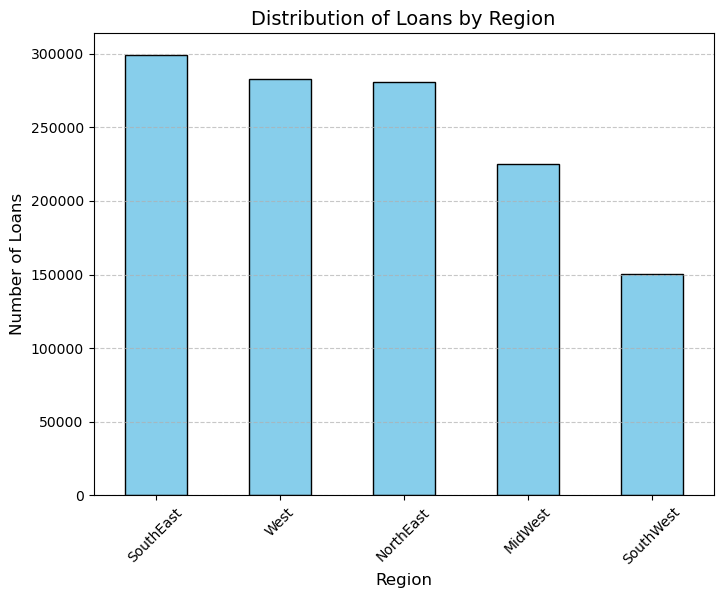

In [45]:
region_counts = accepted_data['region'].value_counts()

plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Loans by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### loan_amnt & installment

Now lets  visualize the distributions of `installment` and `loan_amnt` grouped by loan condition (`Good Loan` vs. `Bad Loan`). 

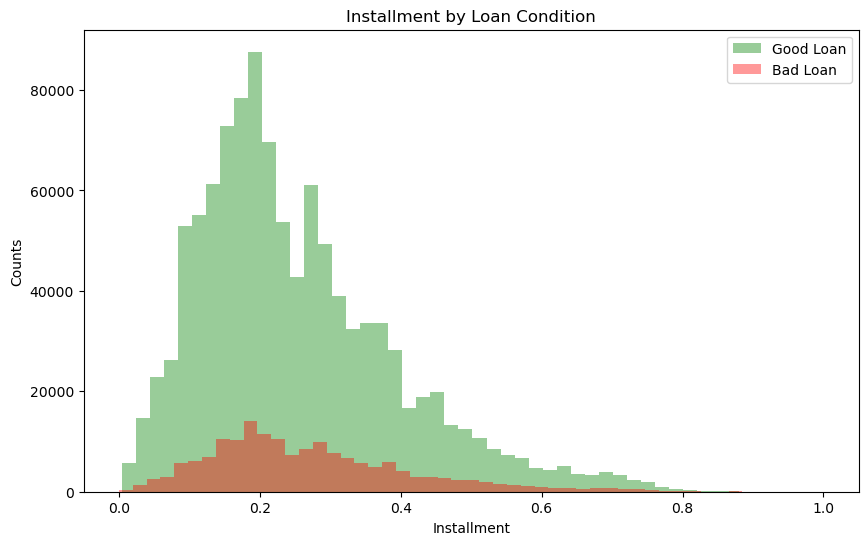

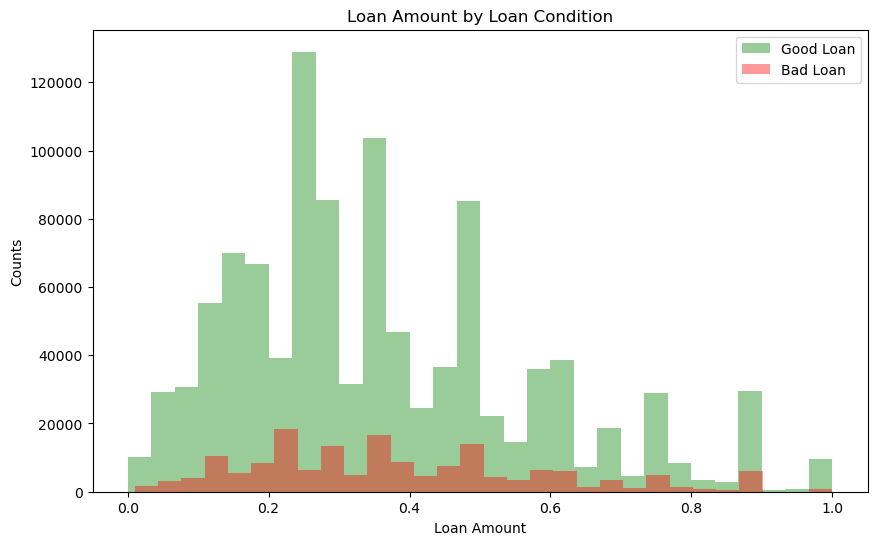

In [48]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
for loan_condition, color in zip(accepted_data['loan_condition'].unique(), ['green', 'red']):
    subset = accepted_data[accepted_data['loan_condition'] == loan_condition]
    plt.hist(subset['installment'], bins=50, alpha=0.4, color=color, label=f'{loan_condition}')

plt.title('Installment by Loan Condition')
plt.xlabel('Installment')
plt.ylabel('Counts')
plt.legend(loc='upper right')
plt.show()


plt.figure(figsize=(10, 6))
for loan_condition, color in zip(accepted_data['loan_condition'].unique(), ['green', 'red']):
    subset = accepted_data[accepted_data['loan_condition'] == loan_condition]
    plt.hist(subset['loan_amnt'], bins=30, alpha=0.4, color=color, label=f'{loan_condition}')

plt.title('Loan Amount by Loan Condition')
plt.xlabel('Loan Amount')
plt.ylabel('Counts')
plt.legend(loc='upper right')
plt.show()

The histograms illustrate how these financial features differ based on the loan's outcome, helping identify patterns in loan performance.

In [50]:
accepted_data.groupby(by='loan_condition')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_condition,,,,,,,,
Bad Loan,168464.0,0.387305,0.209084,0.010152,0.238579,0.365482,0.492386,1.0
Good Loan,1069969.0,0.361244,0.212095,0.000000,0.205584,0.314721,0.492386,1.0


### grade & sub_grade

In [52]:
print(f"GRADE unique: {accepted_data.grade.unique()}")
print(f"SUB_GRADE unique: {accepted_data.sub_grade.unique()}")

GRADE unique: ['C' 'B' 'F' 'A' 'E' 'D' 'G']
SUB_GRADE unique: ['C1' 'B4' 'C5' 'F1' 'A2' 'C2' 'E2' 'A4' 'B1' 'E3' 'C3' 'A1' 'F3' 'C4'
 'B3' 'B2' 'D2' 'D5' 'D3' 'A5' 'B5' 'D1' 'F5' 'D4' 'E5' 'A3' 'E1' 'G1'
 'F2' 'E4' 'G4' 'F4' 'G5' 'G2' 'G3']


Now I am gonna analyze the distribution of `Good Loan` and `Bad Loan` statuses across loan grades. 

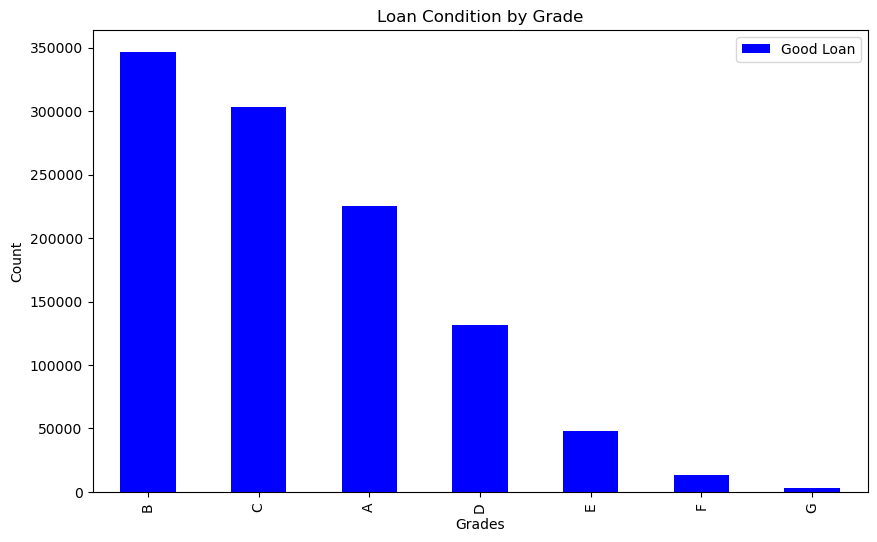

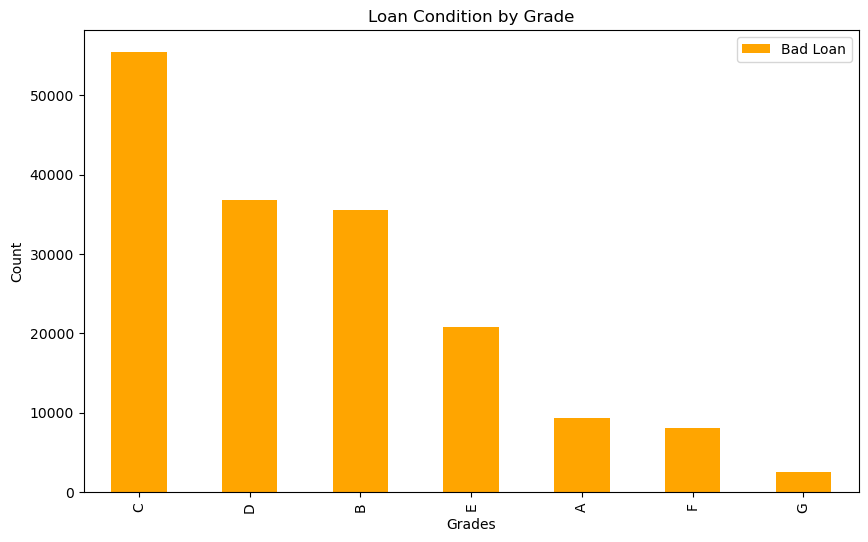

In [54]:
# Bar Plot for Good loan by Grade
Good_loan = accepted_data[accepted_data['loan_condition'] == 'Good Loan']['grade'].value_counts()
Good_loan.plot(kind='bar', figsize=(10, 6), color='blue', label='Good Loan')
plt.title('Loan Condition by Grade')
plt.xlabel('Grades')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Bar Plot for bad loan by Grade
Bad_loan = accepted_data[accepted_data['loan_condition'] == 'Bad Loan']['grade'].value_counts()
Bad_loan.plot(kind='bar', figsize=(10, 6), color='orange', label='Bad Loan')
plt.title('Loan Condition by Grade')
plt.xlabel('Grades')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.show()

The first plot shows the frequency of `Good Loans` by grade, highlighting that most `Good Loans` are concentrated in higher grades (e.g., A, B, C). The second plot illustrates `Bad Loans`, which are more frequent in mid to lower grades (e.g., C, D, E). This analysis reveals a clear relationship between loan grade and loan performance, with higher grades generally associated with better loan outcomes.

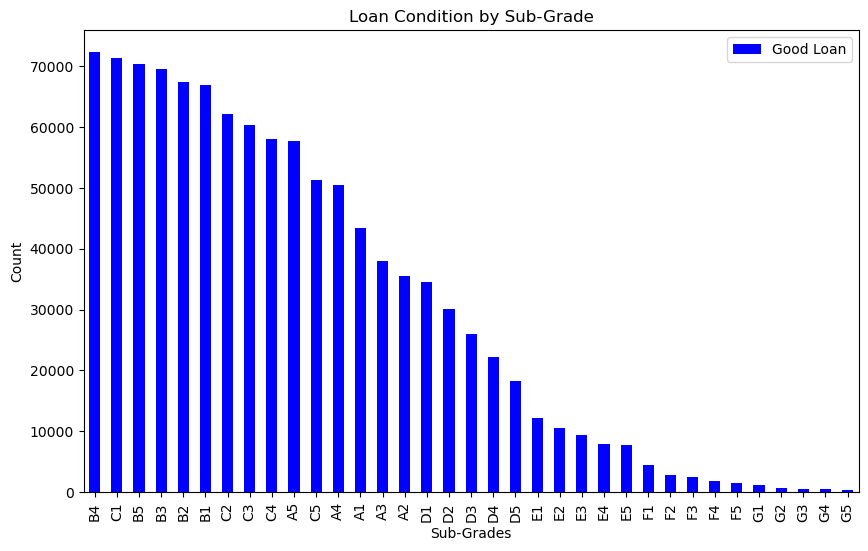

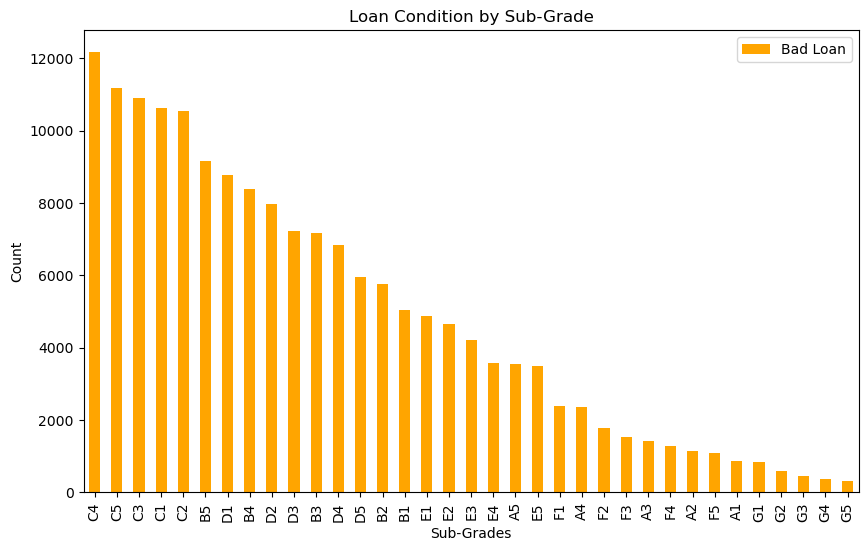

In [56]:
# Bar Plot for Fully Paid by Sub-Grade
Good_Loan = accepted_data[accepted_data['loan_condition'] == 'Good Loan']['sub_grade'].value_counts()
Good_Loan.plot(kind='bar', figsize=(10, 6), color='blue', label='Good Loan')
plt.title('Loan Condition by Sub-Grade')
plt.xlabel('Sub-Grades')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Bar Plot for Charged Off by Sub-Grade
Bad_Loan = accepted_data[accepted_data['loan_condition'] == 'Bad Loan']['sub_grade'].value_counts()
Bad_Loan.plot(kind='bar', figsize=(10, 6), color='orange', label='Bad Loan')
plt.title('Loan Condition by Sub-Grade')
plt.xlabel('Sub-Grades')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.show()

### term, home_ownership, verification_status & purpose

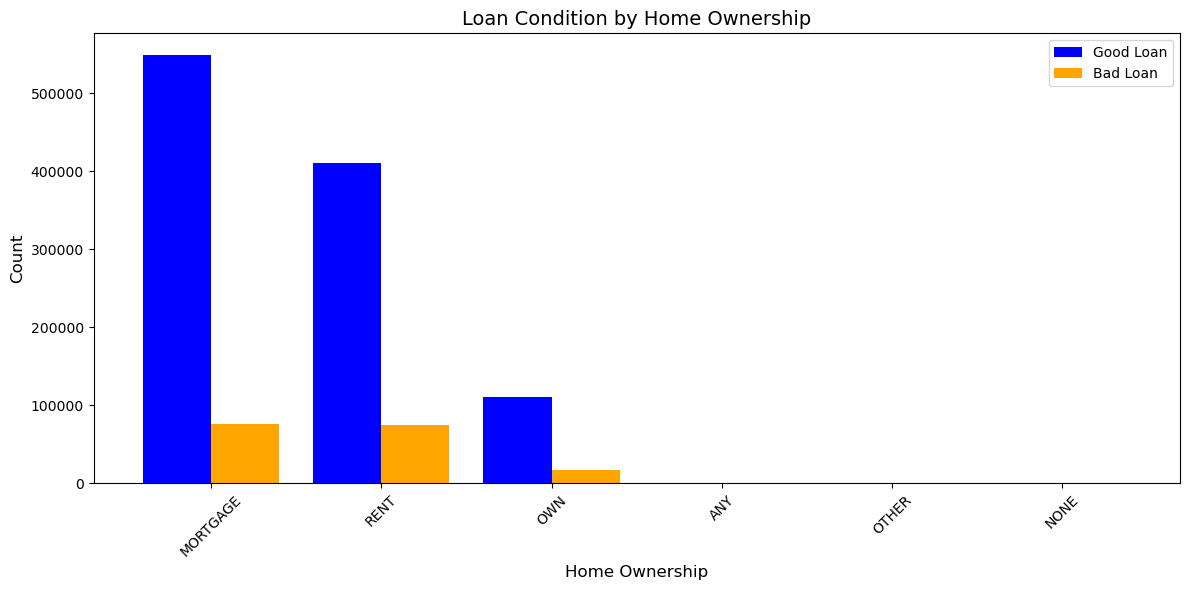

In [58]:
Good_Loan = accepted_data[accepted_data['loan_condition'] == 'Good Loan']['home_ownership'].value_counts()

Bad_Loan = accepted_data[accepted_data['loan_condition'] == 'Bad Loan']['home_ownership'].value_counts()

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.4

x_good = range(len(Good_Loan))
x_bad = [x + bar_width for x in x_good]

ax.bar(x_good, Good_Loan, width=bar_width, color='blue', label='Good Loan')
ax.bar(x_bad, Bad_Loan, width=bar_width, color='orange', label='Bad Loan')

ax.set_title('Loan Condition by Home Ownership', fontsize=14)
ax.set_xlabel('Home Ownership', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks([x + bar_width / 2 for x in x_good])
ax.set_xticklabels(Good_Loan.index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

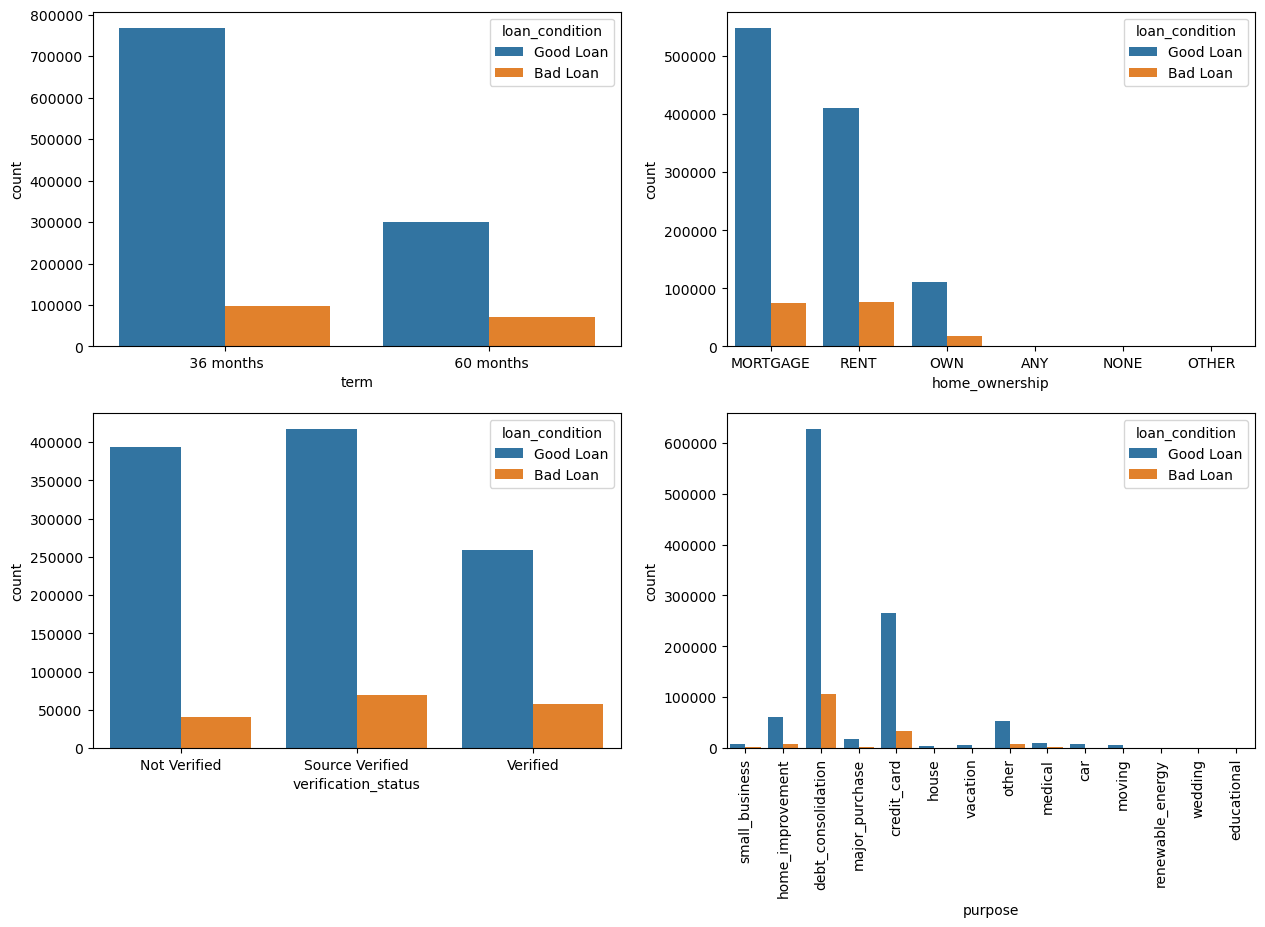

In [59]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=accepted_data, hue='loan_condition')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=accepted_data, hue='loan_condition')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=accepted_data, hue='loan_condition')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=accepted_data, hue='loan_condition')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

The visualizations provide insights into how loan conditions (`Good Loan` vs. `Bad Loan`) vary across key categorical features:
1. **Term**: Loans with a 36-month term have a higher proportion of `Good Loans` compared to those with a 60-month term, which show a slightly higher risk.
2. **Home Ownership**: Borrowers with a mortgage or renting are more prevalent, with `Good Loans` being dominant in both categories. However, the proportion of `Bad Loans` is slightly higher for renters.
3. **Verification Status**: Loans marked as "Source Verified" or "Verified" have a higher proportion of `bad Loans`, indicating a potential link between verification and loan performance.
4. **Purpose**: Debt consolidation dominates the loan purpose, with `Good Loans` significantly outweighing `Bad Loans`. Other purposes, such as small business and educational loans, show a relatively higher risk.


### emp_title, emp_length, issue_d, earliest_cr_line 

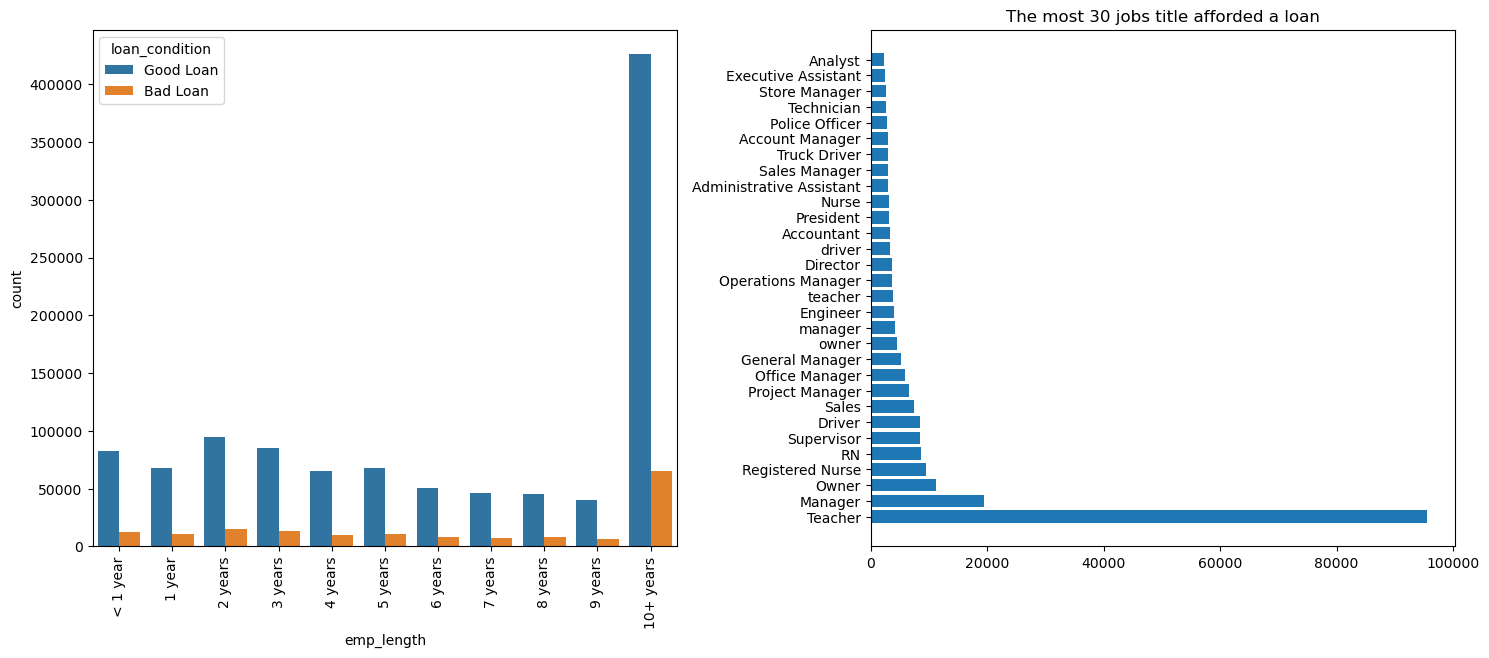

In [62]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=accepted_data, hue='loan_condition', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(accepted_data.emp_title.value_counts()[:30].index, accepted_data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

1. **Employment Length**: Borrowers with longer employment histories (e.g., "10+ years") are more likely to have `Good Loans`.
2. **Job Titles**: The bar chart highlights the top 30 job titles associated with loans. Common roles such as "Teacher," "Manager," and "Owner" dominate, reflecting occupations with higher loan approval rates. These insights suggest that job title and employment length may influence loan outcomes and risk.

In [64]:
accepted_data['issue_d'] = pd.to_datetime(accepted_data['issue_d'])
accepted_data['earliest_cr_line'] = pd.to_datetime(accepted_data['earliest_cr_line'])

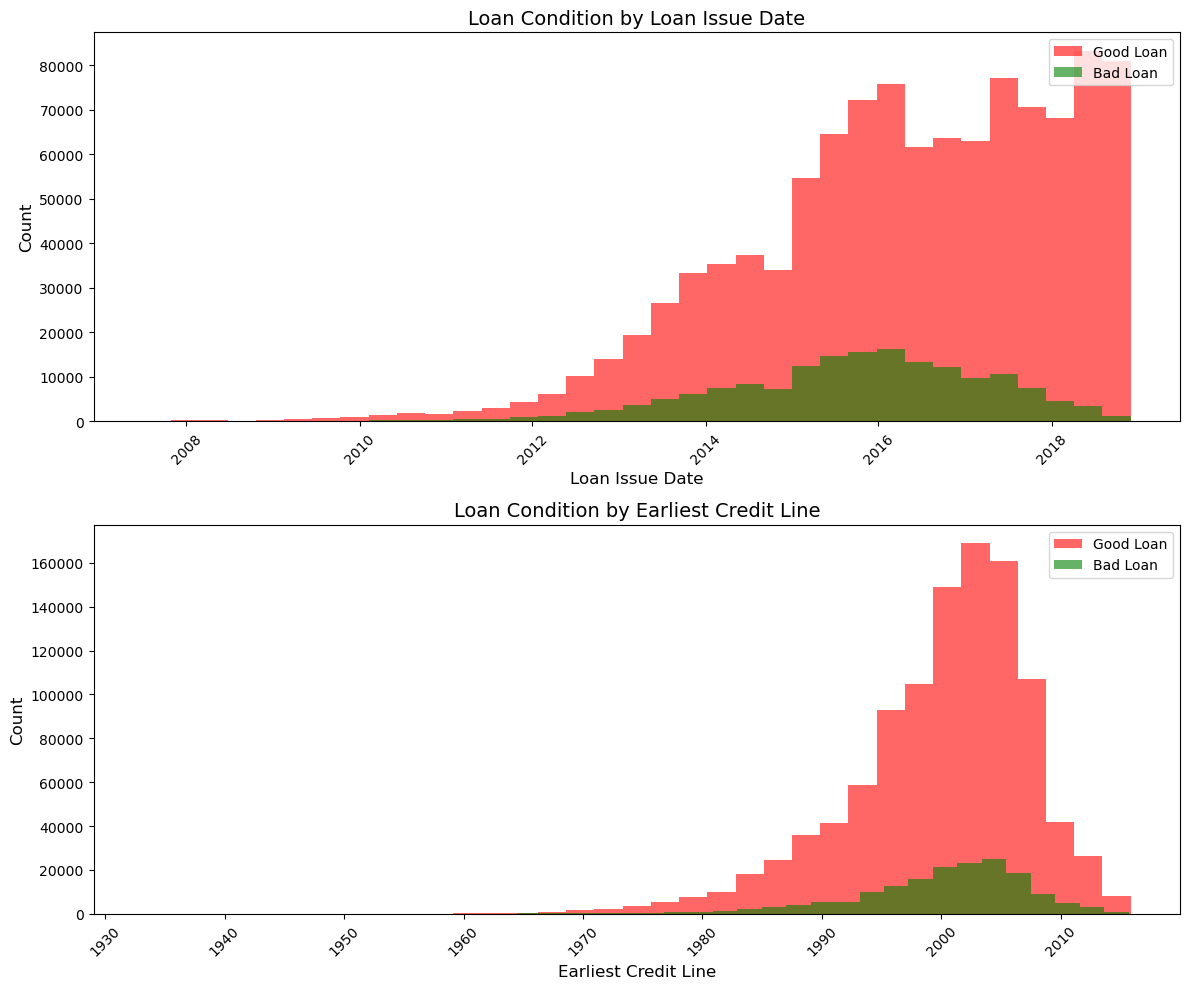

In [65]:

fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

# Subplot 1: Loan condition by Loan Issue Date
for loan_status, color in zip(['Good Loan', 'Bad Loan'], ['red', 'green']):
    subset = accepted_data[accepted_data['loan_condition'] == loan_status]
    axs[0].hist(subset['issue_d'], bins=35, alpha=0.6, color=color, label=f'{loan_status}')

axs[0].set_title('Loan Condition by Loan Issue Date', fontsize=14)
axs[0].set_xlabel('Loan Issue Date', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)
axs[0].legend(loc='upper right')
axs[0].tick_params(axis='x', rotation=45)

# Subplot 2: Loan condition by Earliest Credit Line
for loan_status, color in zip(['Good Loan', 'Bad Loan'], ['red', 'green']):
    subset = accepted_data[accepted_data['loan_condition'] == loan_status]
    axs[1].hist(subset['earliest_cr_line'], bins=35, alpha=0.6, color=color, label=f'{loan_status}')

axs[1].set_title('Loan Condition by Earliest Credit Line', fontsize=14)
axs[1].set_xlabel('Earliest Credit Line', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)
axs[1].legend(loc='upper right')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


1. **Loan Issue Date**: The majority of loans were issued between 2014 and 2018, with `Good Loans` significantly outnumbering `Bad Loans`. This trend reflects the rapid growth of LendingClub during this period.
2. **Earliest Credit Line**: Borrowers with older credit histories (prior to 2000) are more likely to have `Good Loans`, indicating that a longer credit history correlates with better loan performance. In contrast, borrowers with more recent credit histories (after 2000) show an increase in `Bad Loans`.

### int_rate,annual_inc

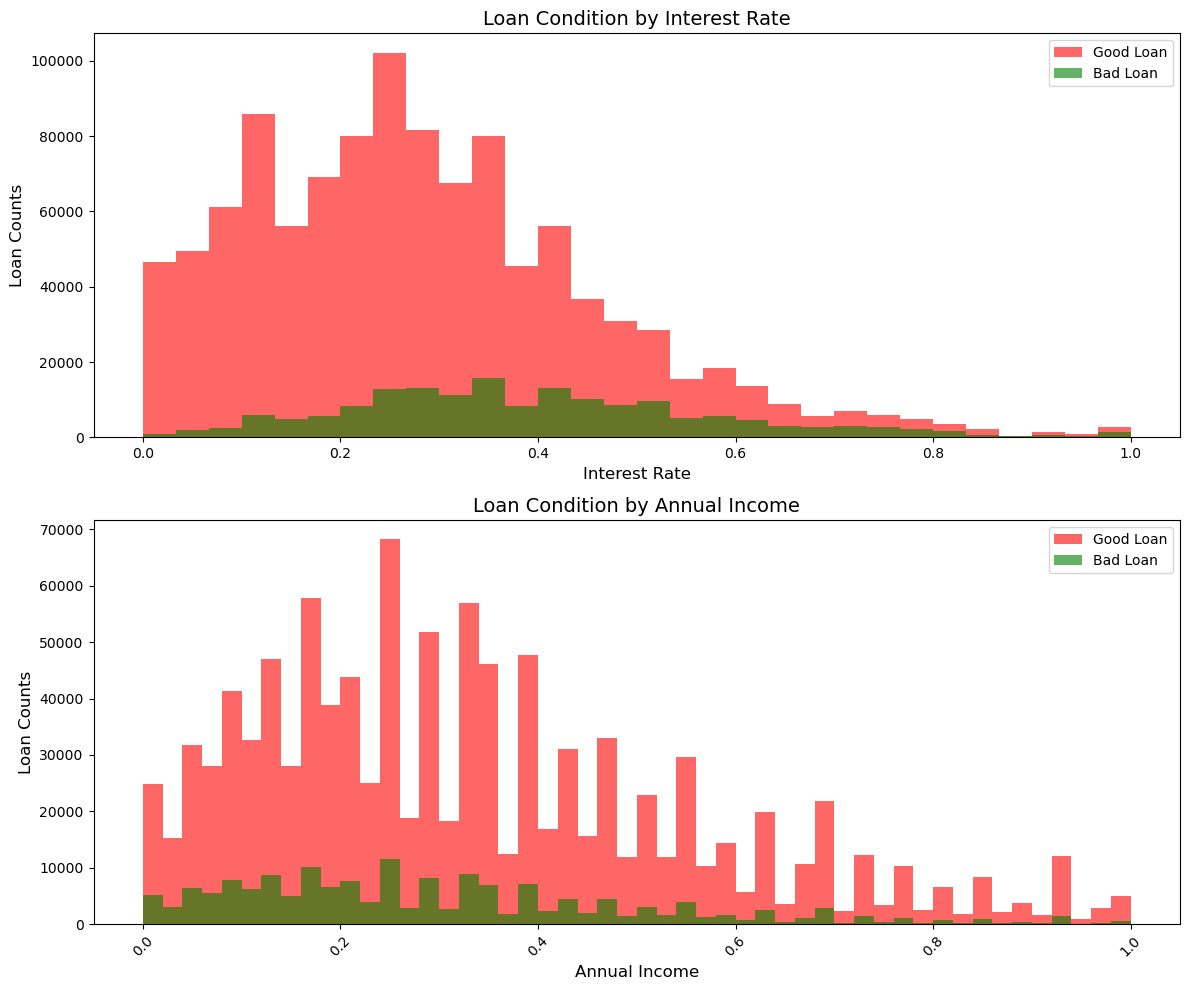

In [68]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

# Subplot 1: Loan Condition by Interest Rate
for loan_status, color in zip(['Good Loan', 'Bad Loan'], ['red', 'green']):
    subset = accepted_data[accepted_data['loan_condition'] == loan_status]
    axs[0].hist(subset['int_rate'], bins=30, alpha=0.6, color=color, label=f'{loan_status}')

axs[0].set_title('Loan Condition by Interest Rate', fontsize=14)
axs[0].set_xlabel('Interest Rate', fontsize=12)
axs[0].set_ylabel('Loan Counts', fontsize=12)
axs[0].legend(loc='upper right')

# Subplot 2: Loan Condition by Annual Income
for loan_status, color in zip(['Good Loan', 'Bad Loan'], ['red', 'green']):
    subset = accepted_data[accepted_data['loan_condition'] == loan_status]
    axs[1].hist(subset['annual_inc'], bins=50, alpha=0.6, color=color, label=f'{loan_status}')

axs[1].set_title('Loan Condition by Annual Income', fontsize=14)
axs[1].set_xlabel('Annual Income', fontsize=12)
axs[1].set_ylabel('Loan Counts', fontsize=12)
axs[1].legend(loc='upper right')
axs[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


1. **Interest Rate**: `Good Loans` dominate across most interest rate ranges, while `Bad Loans` are concentrated at higher interest rates. This trend suggests that higher interest rates are associated with increased loan risk.
2. **Annual Income**: Most loans are issued to borrowers with annual incomes in the lower ranges. However, `Bad Loans` are proportionally higher in these lower income brackets, indicating a potential link between income level and loan performance.

### FICO Scores

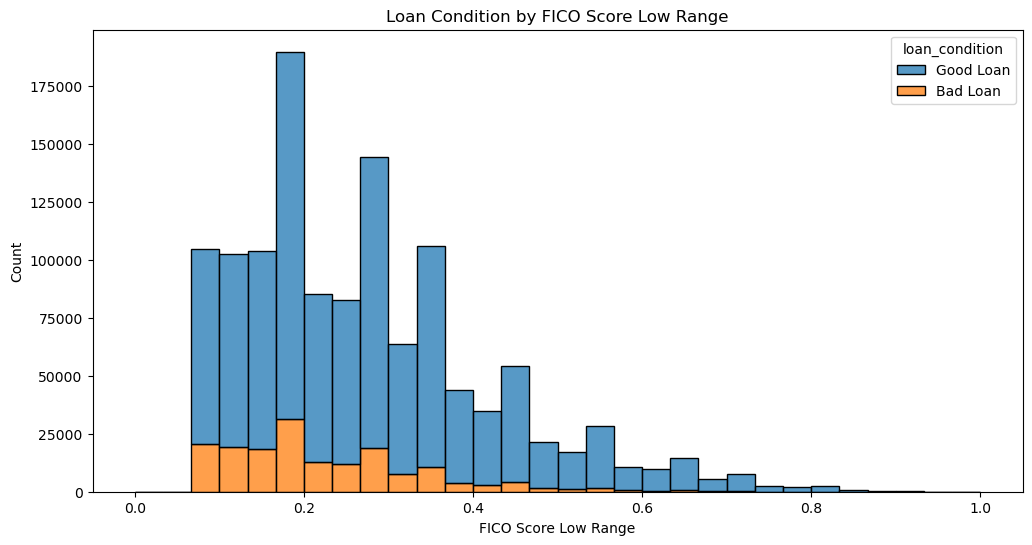

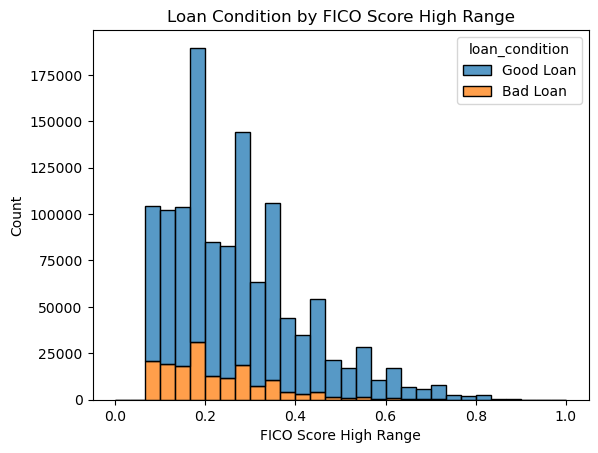

In [71]:
# Distribution of FICO scores by Loan Condition
plt.figure(figsize=(12, 6))
sns.histplot(data=accepted_data, x='fico_range_low', hue='loan_condition', multiple='stack', bins=30)
plt.title('Loan Condition by FICO Score Low Range')
plt.xlabel('FICO Score Low Range')
plt.ylabel('Count')
plt.show()

sns.histplot(data=accepted_data, x='fico_range_high', hue='loan_condition', multiple='stack', bins=30)
plt.title('Loan Condition by FICO Score High Range')
plt.xlabel('FICO Score High Range')
plt.ylabel('Count')
plt.show()


1. **FICO Score Low Range**: The majority of `Good Loans` are concentrated in the lower FICO score ranges (e.g., 0.2 to 0.4). However, `Bad Loans` also have a noticeable presence in these ranges, indicating that lower FICO scores are correlated with higher loan risks.
2. **FICO Score High Range**: Similar trends are observed in the high FICO score ranges, but the proportion of `Bad Loans` decreases as FICO scores increase. This highlights the strong predictive power of FICO scores in assessing creditworthiness and loan performance.

## Debt-to-Income Ratio (DTI) Analysis
The borrower's non-mortgage debt-to-income ratio, calculated as the sum of the borrower's monthly debt payments (excluding mortgage and the requested LC loan) divided by their reported monthly income.

In [74]:
accepted_data['dti'].value_counts()

dti
0.408772    982
0.492982    979
0.450877    970
0.324561    942
0.366667    941
           ... 
0.941754    118
0.981053    112
0.913684    109
0.955789    108
0.997895     86
Name: count, Length: 2851, dtype: int64

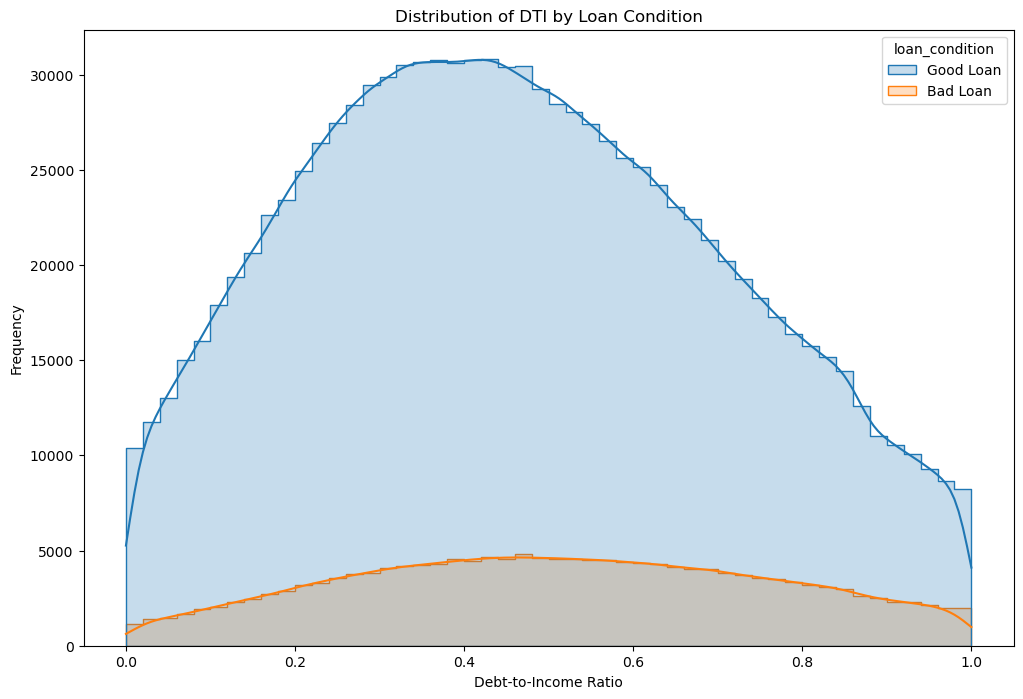

In [75]:
plt.figure(figsize=(12, 8))
sns.histplot(data=accepted_data, x='dti', hue='loan_condition', bins=50, kde=True, element="step", common_norm=False)
plt.title('Distribution of DTI by Loan Condition')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()


### open_acc
The number of open credit lines in the borrower's credit file.


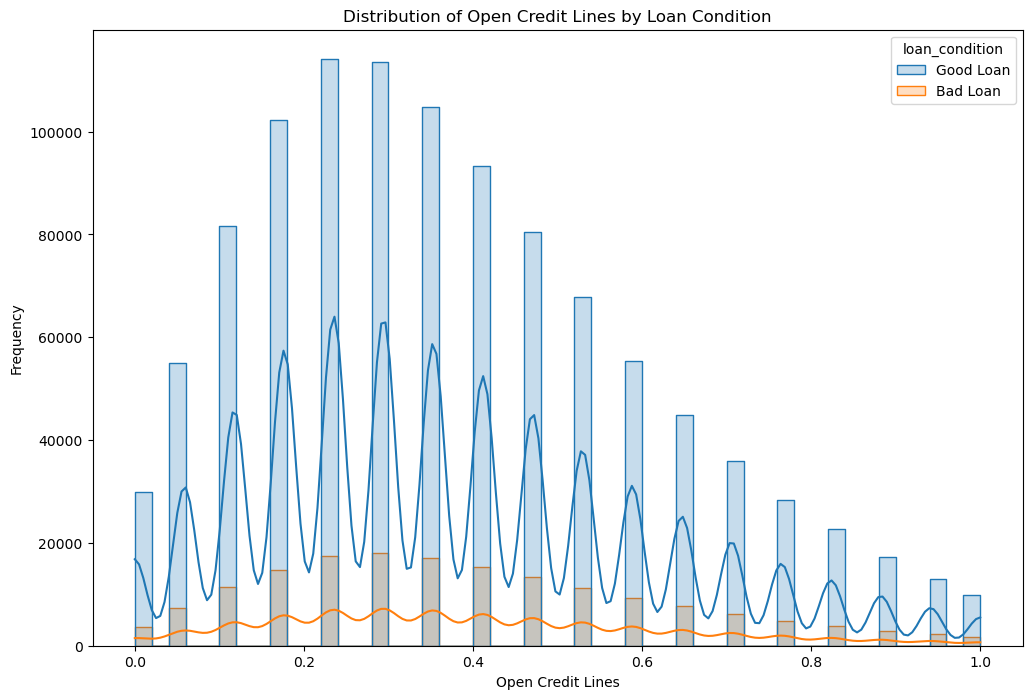

In [77]:
plt.figure(figsize=(12, 8))
sns.histplot(data=accepted_data, x='open_acc', hue='loan_condition', bins=50, kde=True, element="step", common_norm=False)
plt.title('Distribution of Open Credit Lines by Loan Condition')
plt.xlabel('Open Credit Lines')
plt.ylabel('Frequency')
plt.show()


## Public Records (pub_rec)
 Number of derogatory public records

In [79]:
accepted_data['pub_rec'].value_counts()

pub_rec
0.000000    1028241
0.011628     180630
0.023256      19515
0.034884       5952
0.046512       2111
0.058140        949
0.069767        486
0.081395        203
0.093023        111
0.104651         71
0.116279         42
0.127907         38
0.139535         17
0.151163         15
0.186047          7
0.162791          6
0.174419          6
0.220930          5
0.209302          4
0.197674          3
0.255814          3
0.279070          3
0.267442          2
0.244186          2
1.000000          1
0.569767          1
0.604651          1
0.546512          1
0.534884          1
0.430233          1
0.395349          1
0.325581          1
0.627907          1
0.290698          1
0.709302          1
Name: count, dtype: int64

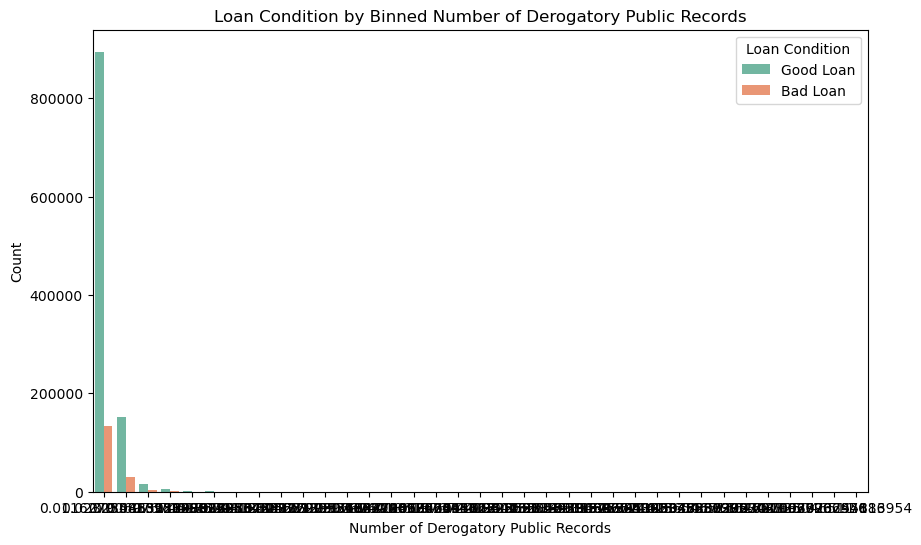

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pub_rec', hue='loan_condition', data=accepted_data, palette='Set2')
plt.title('Loan Condition by Binned Number of Derogatory Public Records')
plt.xlabel('Number of Derogatory Public Records')
plt.ylabel('Count')
plt.legend(title='Loan Condition')
plt.show()


### initial_list_status
The initial listing status of the loan. Possible values are – W, F

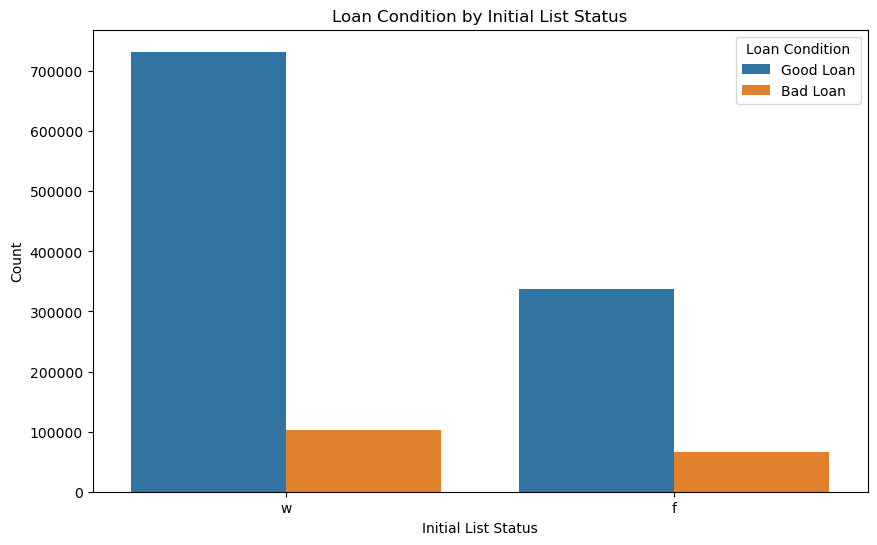

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(x='initial_list_status', hue='loan_condition', data=accepted_data)
plt.title('Loan Condition by Initial List Status')
plt.xlabel('Initial List Status')
plt.ylabel('Count')
plt.legend(title='Loan Condition')
plt.show()


### application_type
Indicates whether the loan is an individual application or a joint application with two co-borrowers

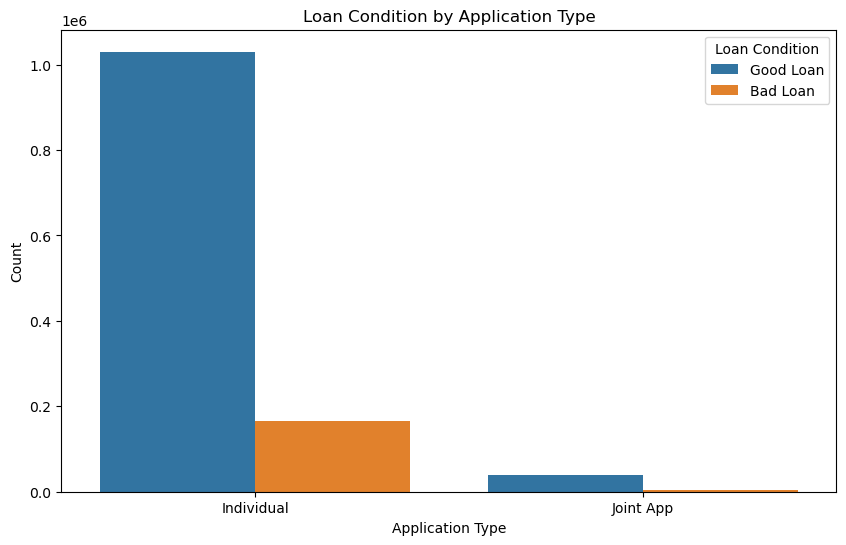

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(x='application_type', hue='loan_condition', data=accepted_data)
plt.title('Loan Condition by Application Type')
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.legend(title='Loan Condition')
plt.show()


### mort_acc
Number of mortgage accounts

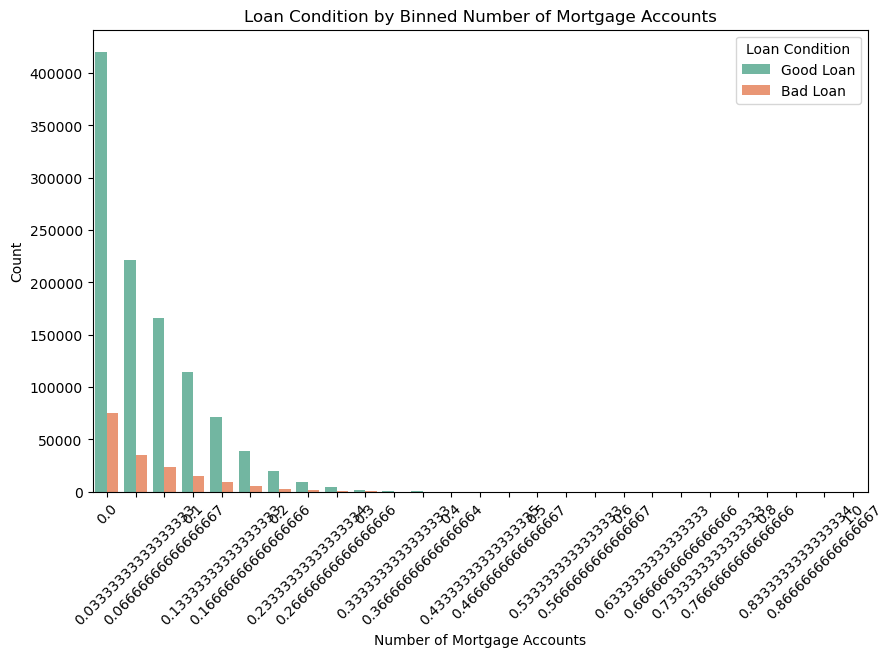

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(x='mort_acc', hue='loan_condition', data=accepted_data, palette='Set2')
plt.title('Loan Condition by Binned Number of Mortgage Accounts')
plt.xlabel('Number of Mortgage Accounts')
plt.ylabel('Count')
plt.legend(title='Loan Condition')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


### pub_rec_bankruptcies
 Number of public record bankruptcies


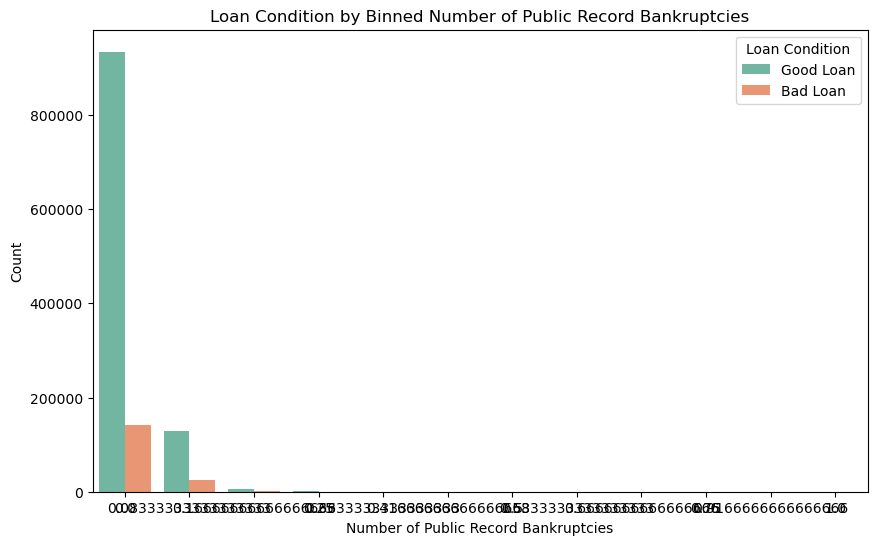

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pub_rec_bankruptcies', hue='loan_condition', data=accepted_data, palette='Set2')
plt.title('Loan Condition by Binned Number of Public Record Bankruptcies')
plt.xlabel('Number of Public Record Bankruptcies')
plt.ylabel('Count')
plt.legend(title='Loan Condition')
plt.show()


## Simplifying our model :

In [90]:
accepted_data.columns

Index(['addr_state', 'annual_inc', 'application_type', 'dti',
       'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high',
       'fico_range_low', 'grade', 'home_ownership', 'id',
       'initial_list_status', 'installment', 'int_rate', 'issue_d',
       'loan_amnt', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies',
       'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title',
       'total_acc', 'verification_status', 'zip_code', 'loan_condition',
       'emp_length_int', 'region'],
      dtype='object')

In [91]:
accepted_data['id'].describe()

count      1238433
unique     1238433
top       68355089
freq             1
Name: id, dtype: int64

The IDs in the dataset are unique, which makes them unsuitable for modeling. As a categorical variable, the high number of distinct values renders it ineffective, and as a numerical variable, the wide variation in magnitudes likely holds no meaningful significance. Therefore, this variable is dropped from the dataset.

In [93]:
accepted_data.drop('id', axis=1, inplace=True)

- **Grade**: The `grade` column is redundant since its information is already captured in the `subgrade` column. To avoid duplication, we drop the `grade` column.


In [95]:
accepted_data.drop('grade', axis=1, inplace=True)

- **Employee Title (`emp_title`)**: The `emp_title` column contains a large number of unique job titles, making it impractical and less useful for modeling. As a result, this column is dropped.


In [97]:
accepted_data.drop('emp_title', axis=1, inplace=True)

In [98]:
accepted_data['loan_condition']

0          Good Loan
1          Good Loan
2          Good Loan
3          Good Loan
4          Good Loan
             ...    
1238428    Good Loan
1238429     Bad Loan
1238430    Good Loan
1238431    Good Loan
1238432    Good Loan
Name: loan_condition, Length: 1238433, dtype: object

To simplify the modeling process and improve compatibility with machine learning algorithms, we converted the `loan_condition` column into a numerical format. In the updated version, `Good Loan` is represented by `0` and `Bad Loan` is represented by `1`.

In [100]:
accepted_data['loan_condition'] = accepted_data['loan_condition'].replace({
    'Good Loan': 0,
    'Bad Loan': 1
}).astype(int)


In [101]:
accepted_data.shape

(1238433, 30)

### Categorical Variables treatment : 

In [103]:
quantitative_cols = accepted_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = accepted_data.select_dtypes(include=['object']).columns


In [104]:
accepted_data['term'] = accepted_data['term'].apply(lambda term: int(term[:3]))

print(accepted_data['term'].value_counts())

term
36    867360
60    371073
Name: count, dtype: int64


In [105]:
accepted_data.columns

Index(['addr_state', 'annual_inc', 'application_type', 'dti',
       'earliest_cr_line', 'emp_length', 'fico_range_high', 'fico_range_low',
       'home_ownership', 'initial_list_status', 'installment', 'int_rate',
       'issue_d', 'loan_amnt', 'mort_acc', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'zip_code', 'loan_condition', 'emp_length_int', 'region'],
      dtype='object')

In [106]:
accepted_data.head()

,addr_state,annual_inc,application_type,dti,earliest_cr_line,emp_length,fico_range_high,fico_range_low,home_ownership,initial_list_status,...,revol_util,sub_grade,term,title,total_acc,verification_status,zip_code,loan_condition,emp_length_int,region
0,SD,0.282477,Individual,0.382807,1999-12-01,10+ years,0.364078,0.365854,MORTGAGE,w,...,0.097592,C1,36,Business,0.848485,Not Verified,577xx,0,10.0,MidWest
1,IL,0.267372,Joint App,0.197544,2000-08-01,10+ years,0.266990,0.268293,MORTGAGE,w,...,0.566540,B4,60,Debt consolidation,0.242424,Not Verified,605xx,0,10.0,MidWest
2,NJ,0.622356,Individual,0.417895,2008-09-01,10+ years,0.703883,0.707317,MORTGAGE,w,...,0.001267,C5,60,Debt consolidation,0.212121,Source Verified,076xx,0,10.0,NorthEast
3,PA,0.580310,Individual,0.709474,1998-06-01,3 years,0.266990,0.268293,MORTGAGE,w,...,0.671736,F1,60,Major purchase,0.757576,Source Verified,174xx,0,3.0,NorthEast
4,PA,0.433535,Individual,0.277895,2002-04-01,6 years,0.218447,0.219512,RENT,w,...,0.291508,A2,36,Credit card refinancing,0.393939,Not Verified,160xx,0,6.0,NorthEast


### Cramér's V
To understand how categorical features relate to the target variable (`loan_condition`), I will use **Cramér's V**, a statistical method that measures the strength of association between two categorical variables. 

Cramér's V ranges from **0 (no association)** to **1 (strong association)**, making it a simple and effective way to identify which features might be most important for predicting the target variable.

In [108]:

from scipy.stats import chi2_contingency

def cramers_v(contingency_table):
    """
    Calculate Cramér's V for a contingency table.
    """
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))




In [109]:
def compute_cramers_v_for_categorical(dataframe, target_var):
    """
    Compute Cramér's V between the target variable and all other categorical variables in the DataFrame.
    """
    categorical_vars = dataframe.select_dtypes(include=['object', 'category']).columns
    categorical_vars = [col for col in categorical_vars if col != target_var]  # Exclude the target variable

    results = []
    for var in categorical_vars:        
        contingency_table = pd.crosstab(dataframe[var], dataframe[target_var])
        v = cramers_v(contingency_table)
        results.append({'Variable': var, 'Cramer\'s V': v})
    
    results_df = pd.DataFrame(results).sort_values(by="Cramer's V", ascending=False)
    return results_df



In [110]:
target_variable = 'loan_condition' 
cramers_v_results = compute_cramers_v_for_categorical(accepted_data, target_variable)

print(cramers_v_results)

               Variable  Cramer's V
6             sub_grade    0.237490
7                 title    0.196151
8   verification_status    0.100759
9              zip_code    0.058597
4   initial_list_status    0.054202
5               purpose    0.051192
3        home_ownership    0.050046
0            addr_state    0.043050
1      application_type    0.031662
10               region    0.012888
2            emp_length    0.010887


The results show that variables like **`sub_grade` (0.237)** and **`title` (0.196)** have the strongest associations with the target variable, meaning they are likely to provide valuable information for prediction. 

On the other hand, variables such as **`emp_length` (0.011)** and **`region` (0.013)** show very weak associations, suggesting they are less relevant for modeling.

I will  drop categorical variables with a Cramér's V value below **0.03**, as they show weak associations with the target variable. However, I will keep the `region` column despite its low association because it might be useful for merging this dataset with external climate data later.

In [112]:
accepted_data = accepted_data.drop(columns=["emp_length","application_type"])
print("Remaining columns:", accepted_data.columns.tolist())


Remaining columns: ['addr_state', 'annual_inc', 'dti', 'earliest_cr_line', 'fico_range_high', 'fico_range_low', 'home_ownership', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code', 'loan_condition', 'emp_length_int', 'region']


### Numerical Variables Treatment : Correlation Heatmap

To evaluate the relationships between numerical variables and the target variable, I will compute  a correlation matrix and visualize it using a heatmap. Correlation measures the linear relationship between variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). This helps identify which numerical variables are strongly correlated with the target, guiding feature selection.

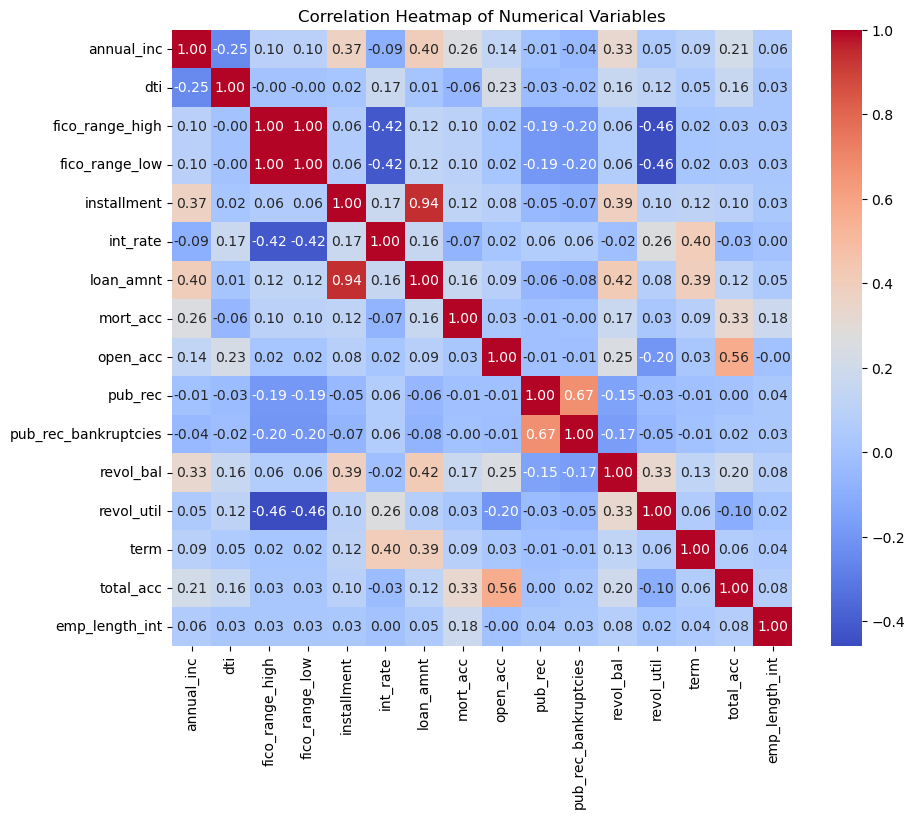

In [115]:
numerical_columns = accepted_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = accepted_data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

To simplify the model and reduce redundancy, I will  remove the `installment` variable as it is highly correlated with `loan_amnt` (correlation = 0.94). Retaining both variables would introduce multicollinearity, so keeping `loan_amnt` ensures that the model remains interpretable while maintaining the information carried by `installment`.

In [117]:
accepted_data = accepted_data.drop(columns=["installment"])
print("Remaining columns:", accepted_data.columns.tolist())


Remaining columns: ['addr_state', 'annual_inc', 'dti', 'earliest_cr_line', 'fico_range_high', 'fico_range_low', 'home_ownership', 'initial_list_status', 'int_rate', 'issue_d', 'loan_amnt', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code', 'loan_condition', 'emp_length_int', 'region']


## Building our model : 

After reducing the dataset by removing redundant and less impactful features, I now have the remaining variables shown above. Next, I will build two predictive models for the target variable `loan_condition`:

1. **Logistic Regression**: A simple and interpretable model suitable for binary classification tasks. 
2. **Random Forest**: A more complex and powerful model that handles feature interactions and non-linear relationships effectively.


First, let's transform the categorical variables into numerical representations. Since both Logistic Regression and Random Forest require numerical inputs, this step ensures that all features are in the correct format.

In [121]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = accepted_data.select_dtypes(include=['object', 'category']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)  
encoded_cols = encoder.fit_transform(accepted_data[categorical_cols])

encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))


numerical_cols = accepted_data.select_dtypes(include=['float64', 'int64']).drop(columns=['loan_condition']).columns
processed_data = pd.concat([accepted_data[numerical_cols], encoded_df, accepted_data['loan_condition']], axis=1)

print("Processed Data Columns:\n", processed_data.columns.tolist())


MemoryError: Unable to allocate 367. GiB for an array with shape (1238433, 39820) and data type float64

### Handling High Cardinality in Categorical Variables

During the one-hot encoding process, a memory error occurred due to high-cardinality categorical variables like `zip_code` and `addr_state`. High cardinality leads to the creation of a very large number of columns, which is computationally expensive and memory-intensive.

To address this, I will:
1. Apply **frequency encoding** for high-cardinality variables. This approach replaces each category with its occurrence frequency in the dataset, reducing the dimensionality while retaining meaningful information.
2. Use **one-hot encoding** for low-cardinality variables (e.g., variables with fewer than 20 unique categories), as it is still an effective method for such cases.

This strategy balances computational efficiency with model performance and ensures the data is prepared effectively for modeling.


#### Separate High- and Low-Cardinality Variables


In [122]:
high_cardinality_threshold = 20

cardinality = accepted_data[categorical_cols].nunique()
high_cardinality_cols = cardinality[cardinality > high_cardinality_threshold].index.tolist()
low_cardinality_cols = cardinality[cardinality <= high_cardinality_threshold].index.tolist()

print("High-Cardinality Columns:", high_cardinality_cols)
print("Low-Cardinality Columns:", low_cardinality_cols)


High-Cardinality Columns: ['addr_state', 'sub_grade', 'title', 'zip_code']
Low-Cardinality Columns: ['home_ownership', 'initial_list_status', 'purpose', 'verification_status', 'region']


#### Apply Encoding


In [124]:
for col in high_cardinality_cols:
    accepted_data[col + '_freq'] = accepted_data[col].map(accepted_data[col].value_counts())


encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = encoder.fit_transform(accepted_data[low_cardinality_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(low_cardinality_cols), index=accepted_data.index)

numerical_cols = accepted_data.select_dtypes(include=['float64', 'int64']).drop(columns=['loan_condition'], errors='ignore').columns

processed_data = pd.concat(
    [accepted_data[numerical_cols], accepted_data.filter(like='_freq'), encoded_df, accepted_data['loan_condition']],
    axis=1
)

print("Processed Data Columns:\n", processed_data.columns.tolist())


Processed Data Columns:
 ['annual_inc', 'dti', 'fico_range_high', 'fico_range_low', 'int_rate', 'loan_amnt', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'term', 'total_acc', 'emp_length_int', 'addr_state_freq', 'sub_grade_freq', 'title_freq', 'zip_code_freq', 'addr_state_freq', 'sub_grade_freq', 'title_freq', 'zip_code_freq', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'initial_list_status_w', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'verification_status_Source Verified', 'verification_status_Verified', 'region_NorthEast', 'region_SouthEast', 'region_SouthWest', 'region_West', 'loan_condition']


#### Logistic Regression:

In [127]:
from sklearn.model_selection import train_test_split

X = processed_data.drop(columns=['loan_condition'])
y = processed_data['loan_condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_model = LogisticRegression(
    penalty='l2',       
    C=1.0,              
    solver='lbfgs',     
    max_iter=500,       
    random_state=42     
)


log_model.fit(X_train, y_train)
y_pred_lr = log_model.predict(X_test)

print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Test Accuracy: 0.8638010389470567
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93    321048
           1       0.43      0.01      0.01     50482

    accuracy                           0.86    371530
   macro avg       0.65      0.50      0.47    371530
weighted avg       0.81      0.86      0.80    371530

Confusion Matrix:
 [[320583    465]
 [ 50137    345]]


The Logistic Regression model achieved an accuracy of **86.38%** on the test set. While the model performs well for class `0` with a precision of **0.86** and recall of **1.00**, it struggles with class `1`, achieving only **0.43** precision and **0.01** recall. This indicates a significant class imbalance in the dataset.


To address this imbalance, future steps could include:
- Applying **oversampling** (e.g., SMOTE) or **undersampling** to balance the dataset.
- Using **class weights** in the Logistic Regression model (`class_weight='balanced'`).
- Exploring alternative models like Random Forest with imbalance handling.

#### Random Forest:

In [133]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,        
    max_depth=None,          
    min_samples_split=2,     
    min_samples_leaf=1,      
    bootstrap=True,          
    random_state=42         
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Test Accuracy: 0.8640513552068474
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93    321048
           1       0.49      0.01      0.02     50482

    accuracy                           0.86    371530
   macro avg       0.68      0.50      0.47    371530
weighted avg       0.81      0.86      0.80    371530

Confusion Matrix:
 [[320437    611]
 [ 49898    584]]



The Random Forest model achieved an accuracy of **86.40%**, slightly better than the Logistic Regression model. It performs well for class `0` with a precision of **0.87** and recall of **1.00**, but struggles with class `1`, achieving **0.49** precision and only **0.01** recall. This indicates that the class imbalance is still affecting the model's ability to predict the minority class effectively.


To improve the model's performance, particularly for the minority class, more things could be implemented :
- **RandomizedSearchCV** or **GridSearchCV** to tune hyperparameters such as the number of trees (`n_estimators`), maximum depth (`max_depth`), and minimum samples per leaf (`min_samples_leaf`).
- Techniques to handle class imbalance, such as using **class weights** or **oversampling** .




## Integrating Climate Factors

To gather data for climate-related events, we will use the **EM-DAT (Emergency Events Database)**. EM-DAT is a comprehensive and authoritative source of data on the occurrence and effects of global disasters. It provides detailed information on various types of natural disasters, such as floods, hurricanes, earthquakes, and more.

For this study, we will focus on **natural disasters in the United States** during the period from **2007 to 2018**. This time frame aligns with the period of the **Lending Club dataset** we are analyzing, ensuring that both datasets cover the same years. This alignment will enable us to explore potential correlations between climate-related events and loan performance.

### **Selection Criteria**:
1. **Classification**: Only natural disasters are included.
2. **Country**: The United States of America (USA).
3. **Time Period**: From **2007** to **2018**, matching the Lending Club dataset.

We will merge this dataset with the LendingClub one to integrate the climate factors.

In [141]:
climate_df=pd.read_excel("EMDAT_CLIMATE_DATASET.xlsx")

In [143]:
climate_df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2007-0026-USA,No,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,USA,...,NaN,NaN,200000.0,293912.0,500000.0,734779.0,68.047674,"[{""adm1_code"":3218,""adm1_name"":""California""},{...",2008-03-28,2023-09-25
1,2007-0041-USA,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,68.047674,"[{""adm1_code"":3217,""adm1_name"":""Arkansas""},{""a...",2007-02-01,2023-09-25
2,2007-0048-USA,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,GLIDE:TO-2007-000024,NaN,USA,...,NaN,NaN,100000.0,146956.0,130000.0,191043.0,68.047674,"[{""adm2_code"":29031,""adm2_name"":""Lake""},{""adm2...",2008-08-04,2023-09-25
3,2007-0066-USA,No,nat-met-sto-bli,Natural,Meteorological,Storm,Blizzard/Winter storm,NaN,NaN,USA,...,NaN,NaN,100000.0,146956.0,140000.0,205738.0,68.047674,"[{""adm1_code"":3244,""adm1_name"":""New Jersey""},{...",2008-01-03,2023-09-25
4,2007-0083-USA,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,USA,...,NaN,NaN,450000.0,661301.0,600000.0,881735.0,68.047674,"[{""adm1_code"":3214,""adm1_name"":""Alabama""},{""ad...",2008-04-16,2023-09-25


In [145]:
column_names = climate_df.columns.tolist()
print(column_names)


['DisNo.', 'Historic', 'Classification Key', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region', 'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal', 'Declaration', "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected', "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)", 'CPI', 'Admin Units', 'Entry Date', 'Last Update']


In [149]:
unique_locations = accepted_data['addr_state'].unique()
print(unique_locations)

['SD' 'IL' 'NJ' 'PA' 'SC' 'TX' 'CA' 'VA' 'AZ' 'NY' 'IN' 'MD' 'KS' 'AL'
 'WA' 'OH' 'MI' 'LA' 'MO' 'MA' 'FL' 'WI' 'RI' 'GA' 'HI' 'VT' 'TN' 'NC'
 'CT' 'OR' 'DE' 'NV' 'WV' 'MT' 'NH' 'CO' 'MN' 'WY' 'OK' 'KY' 'AR' 'NE'
 'MS' 'NM' 'ME' 'UT' 'ND' 'DC' 'AK' 'ID' 'IA']


In [153]:
unique_locations = climate_df['Location'].unique()
print(unique_locations)

['California, Texas, Georgia, South Carolina, Oklahoma, Missouri, Iowa, Michigan, New York, Maine, Kansas, Illinois provinces'
 'Indiana, Arkansas, Texas, Ohio, Missouri provinces'
 'Volusia, Lake, Sumter, Seminole districts (Florida province)'
 'New York, Vermont, New Jersey, Ohio, Pennsylvania provinces'
 'Alabama, Missouri, Georgia, Minnesota provinces' 'Texas province'
 'Texas, Kansas, Oklahoma provinces'
 'Wichita Falls area (Wichita district, Texas province), Georgetown areas (Williamson district, Texas province), Burnet, Marble Falls, Granite Shoals areas (Burnet district, Texas province), Granbury area (Hood district, Texas province), Lampasas, Parker, Eastland districts (Texas province), Miami, Commerce areas (Ottawa district, Oklahoma province), Shawnee, Tecumseh, Maud areas (Pottawatomie district, Oklahoma province), Oklahoma city (Oklahoma district, Oklahoma province), Waurika area (Jefferson district, Oklahoma province), Bartlesville, Dewey areas (Washington district, Okla

We notice that the Location variable may contain multiple cities affected by the natural disaster. The first step is to split a single row containing, for example, 3 cities into 3 separate rows, each with one city.

In [158]:
def split_locations(df, location_column_name):
  
    split_locs = df[location_column_name].str.split(',').apply(lambda x: [loc.replace(' provinces', '').strip() for loc in x])
    new_rows = []
    for _, row in df.iterrows():
        for loc in split_locs.loc[_]:
            new_row = row.copy()
            new_row[location_column_name] = loc
            new_rows.append(new_row)
            
    new_df = pd.DataFrame(new_rows).reset_index(drop=True)
    return new_df



In [162]:
expanded_climate = split_locations(climate_df, 'Location')
expanded_climate['Location']

0                              California
1                                   Texas
2                                 Georgia
3                          South Carolina
4                                Oklahoma
                      ...                
2479                           Chatsworth
2480                          Bell Canyon
2481                         Hidden Hills
2482    Malibu and Calabasas (California)
2483                           Nationwide
Name: Location, Length: 2484, dtype: object

In [164]:
unique_locations = expanded_climate['Location'].unique()
print(unique_locations)

['California' 'Texas' 'Georgia' 'South Carolina' 'Oklahoma' 'Missouri'
 'Iowa' 'Michigan' 'New York' 'Maine' 'Kansas' 'Illinois' 'Indiana'
 'Arkansas' 'Ohio' 'Volusia' 'Lake' 'Sumter'
 'Seminole districts (Florida province)' 'Vermont' 'New Jersey'
 'Pennsylvania' 'Alabama' 'Minnesota' 'Texas province'
 'Wichita Falls area (Wichita district' 'Texas province)'
 'Georgetown areas (Williamson district' 'Burnet' 'Marble Falls'
 'Granite Shoals areas (Burnet district' 'Granbury area (Hood district'
 'Lampasas' 'Parker' 'Eastland districts (Texas province)' 'Miami'
 'Commerce areas (Ottawa district' 'Oklahoma province)' 'Shawnee'
 'Tecumseh' 'Maud areas (Pottawatomie district'
 'Oklahoma city (Oklahoma district' 'Waurika area (Jefferson district'
 'Bartlesville' 'Dewey areas (Washington district' 'Love'
 'Lincoln districts (Oklahoma province)'
 'Coffeyville area (Montgomery district' 'Kansas province)'
 'Osawatomie area (Miami district' 'Allen' 'Labette' 'Neosho' 'Wilson'
 'Woodson districts 

In [166]:
def abbrev_to_full_list(state_abbrev_list):
   
    abbrev_to_full_name = {
        'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 
        'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 
        'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 
        'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 
        'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 
        'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 
        'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 
        'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 
        'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 
        'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 
        'DC': 'District of Columbia'
    }
    
    full_names_list = [abbrev_to_full_name.get(abbrev, abbrev) for abbrev in state_abbrev_list]
    
    return full_names_list
accepted_data['addr_state'] = accepted_data['addr_state'].apply(abbrev_to_full_list)



In [168]:
accepted_data['addr_state'] = accepted_data['addr_state'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

unique_locations = accepted_data['addr_state'].unique()
print(unique_locations)

['S, D' 'I, L' 'N, J' 'P, A' 'S, C' 'T, X' 'C, A' 'V, A' 'A, Z' 'N, Y'
 'I, N' 'M, D' 'K, S' 'A, L' 'W, A' 'O, H' 'M, I' 'L, A' 'M, O' 'M, A'
 'F, L' 'W, I' 'R, I' 'G, A' 'H, I' 'V, T' 'T, N' 'N, C' 'C, T' 'O, R'
 'D, E' 'N, V' 'W, V' 'M, T' 'N, H' 'C, O' 'M, N' 'W, Y' 'O, K' 'K, Y'
 'A, R' 'N, E' 'M, S' 'N, M' 'M, E' 'U, T' 'N, D' 'D, C' 'A, K' 'I, D'
 'I, A']


Let's standarize the city names for the second dataset now 

In [171]:
simplified_states = [
    'Pennsylvania', 'South Dakota', 'Illinois', 'New Jersey', 'Georgia',
    'Minnesota', 'South Carolina', 'Rhode Island', 'Texas', 'North Carolina',
    'California', 'Virginia', 'Arizona', 'New York', 'Indiana', 'Maryland',
    'Kansas', 'New Mexico', 'Alabama', 'Washington', 'Missouri', 'Ohio',
    'Louisiana', 'Florida', 'Colorado', 'Michigan', 'Tennessee',
    'District of Columbia', 'Massachusetts', 'Wisconsin', 'Hawaii', 'Vermont',
    'Delaware', 'New Hampshire', 'Nebraska', 'Connecticut', 'Oregon', 'Arkansas',
    'Montana', 'Nevada', 'West Virginia', 'Wyoming', 'Oklahoma', 'Kentucky',
    'Mississippi', 'Maine', 'Utah', 'North Dakota', 'Alaska', 'Idaho', 'Iowa'
]

def clean_and_extract_state(name):
    for state in simplified_states:
        if state in name:
            return state
    return None  

expanded_climate['Location'] = expanded_climate['Location'].apply(clean_and_extract_state)
print(expanded_climate['Location'])

0           California
1                Texas
2              Georgia
3       South Carolina
4             Oklahoma
             ...      
2479              None
2480              None
2481              None
2482        California
2483              None
Name: Location, Length: 2484, dtype: object


In [173]:
expanded_climate_cleaned = expanded_climate.dropna(subset=['Location'])
print(expanded_climate_cleaned['Location'])

0           California
1                Texas
2              Georgia
3       South Carolina
4             Oklahoma
             ...      
2469         Minnesota
2470            Kansas
2471         Louisiana
2472         Tennessee
2482        California
Name: Location, Length: 1950, dtype: object


Now that the location variables in both datasets have been standardized, we will proceed to standardize the date variables. After this, the two datasets will be merged using the location and date variables. During the merging process, we will retain only the following variables:
- **`Total Damage ('000 US$)`**
- **`Disaster Type`**

Additionally, we will create a binary variable named **`Catastrophe_Occurred`** to indicate whether a natural disaster occurred in the given location and time period.

In [175]:
expanded_climate_cleaned['Entry Date'] = pd.to_datetime(expanded_climate_cleaned['Entry Date'])

expanded_climate_cleaned['Year'] = expanded_climate_cleaned['Entry Date'].dt.year

accepted_data['issue_d'] = pd.to_datetime(accepted_data['issue_d'])

accepted_data['Year']=accepted_data['issue_d'].dt.year

In [177]:
expanded_climate_cleaned = expanded_climate_cleaned.drop(['Entry Date'], axis=1)
accepted_data = accepted_data.drop(['issue_d'], axis=1)


In [179]:
 df_disasters_reduced= expanded_climate_cleaned[["Year", "Location", "Total Damage, Adjusted ('000 US$)", "Disaster Type"]]


In [181]:
df_disasters_reduced.head(10)

,Year,Location,"Total Damage, Adjusted ('000 US$)",Disaster Type
0,2008,California,734779.0,Storm
1,2008,Texas,734779.0,Storm
2,2008,Georgia,734779.0,Storm
3,2008,South Carolina,734779.0,Storm
4,2008,Oklahoma,734779.0,Storm
5,2008,Missouri,734779.0,Storm
6,2008,Iowa,734779.0,Storm
7,2008,Michigan,734779.0,Storm
8,2008,New York,734779.0,Storm
9,2008,Maine,734779.0,Storm


## Merging Datasets and Creating the Binary Variable

We will now merge the two datasets using the standardized location and date variables. During this process, we will create a binary variable named **`Catastrophe_Occurred`** to indicate whether a natural disaster occurred in the given location and time period.


In [184]:
accepted_data = accepted_data.rename(columns={'addr_state': 'Location'})
df_merged = pd.merge(accepted_data, df_disasters_reduced, on=['Year', 'Location'], how='outer', indicator=True)


In [186]:
df_merged.head()

,Location,annual_inc,dti,earliest_cr_line,fico_range_high,fico_range_low,home_ownership,initial_list_status,int_rate,loan_amnt,...,emp_length_int,region,addr_state_freq,sub_grade_freq,title_freq,zip_code_freq,Year,"Total Damage, Adjusted ('000 US$)",Disaster Type,_merge
0,"A, L",0.108761,0.383860,2001-10-01,0.315534,0.317073,OWN,f,0.156542,0.121827,...,1.0,SouthEast,14866.0,76770.0,45.0,955.0,2007,NaN,NaN,left_only
1,"A, L",0.066465,0.483158,2001-09-01,0.194175,0.195122,RENT,f,0.291667,0.238579,...,2.0,SouthEast,14866.0,29135.0,1.0,608.0,2007,NaN,NaN,left_only
2,"A, L",0.622356,0.362807,1993-05-01,0.315534,0.317073,MORTGAGE,f,0.168614,0.137056,...,5.0,SouthEast,14866.0,80706.0,1174.0,1278.0,2007,NaN,NaN,left_only
3,"A, Z",0.184290,0.161053,1994-08-01,0.339806,0.341463,RENT,f,0.255062,0.619289,...,2.0,SouthWest,29817.0,43375.0,1.0,539.0,2007,NaN,NaN,left_only
4,"A, Z",0.271148,0.117544,1989-02-01,0.194175,0.195122,MORTGAGE,f,0.205607,0.162437,...,3.0,SouthWest,29817.0,72732.0,1.0,6665.0,2007,NaN,NaN,left_only


In [189]:
print(df_merged.columns.tolist())

['Location', 'annual_inc', 'dti', 'earliest_cr_line', 'fico_range_high', 'fico_range_low', 'home_ownership', 'initial_list_status', 'int_rate', 'loan_amnt', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code', 'loan_condition', 'emp_length_int', 'region', 'addr_state_freq', 'sub_grade_freq', 'title_freq', 'zip_code_freq', 'Year', "Total Damage, Adjusted ('000 US$)", 'Disaster Type', '_merge']


We will now apply the same steps as previously : 

In [198]:
print("Missing target values:", df_merged['loan_condition'].isna().sum())

df_merged_cleaned = df_merged.dropna(subset=['loan_condition'])

print("Remaining rows after removing missing targets:", df_merged_cleaned.shape[0])

Missing target values: 1950
Remaining rows after removing missing targets: 1238433


In [202]:
categorical_cols = df_merged_cleaned.select_dtypes(include=['object', 'category']).columns

high_cardinality_threshold = 20
cardinality = df_merged[categorical_cols].nunique()
high_cardinality_cols = cardinality[cardinality > high_cardinality_threshold].index.tolist()
low_cardinality_cols = cardinality[cardinality <= high_cardinality_threshold].index.tolist()

print("High-Cardinality Columns:", high_cardinality_cols)
print("Low-Cardinality Columns:", low_cardinality_cols)


High-Cardinality Columns: ['Location', 'sub_grade', 'title', 'zip_code']
Low-Cardinality Columns: ['home_ownership', 'initial_list_status', 'purpose', 'verification_status', 'region', 'Disaster Type', '_merge']


In [204]:
for col in high_cardinality_cols:
    df_merged_cleaned[col + '_freq'] = df_merged_cleaned[col].map(df_merged_cleaned[col].value_counts())

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = encoder.fit_transform(df_merged_cleaned[low_cardinality_cols])

encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(low_cardinality_cols), index=df_merged_cleaned.index)

numerical_cols = df_merged_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['loan_condition'], errors='ignore').columns

processed_data = pd.concat(
    [df_merged_cleaned[numerical_cols], df_merged_cleaned.filter(like='_freq'), encoded_df, df_merged_cleaned['loan_condition']],
    axis=1
)

print("Processed Data Columns:\n", processed_data.columns.tolist())


Processed Data Columns:
 ['annual_inc', 'dti', 'fico_range_high', 'fico_range_low', 'int_rate', 'loan_amnt', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'term', 'total_acc', 'emp_length_int', 'addr_state_freq', 'sub_grade_freq', 'title_freq', 'zip_code_freq', "Total Damage, Adjusted ('000 US$)", 'Location_freq', 'addr_state_freq', 'sub_grade_freq', 'title_freq', 'zip_code_freq', 'Location_freq', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'initial_list_status_w', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'verification_status_Source Verified', 'verification_status_Verified', 'region_NorthEast', 'region_SouthEast', 'region_So

In [206]:
X = processed_data.drop(columns=['loan_condition'])
y = processed_data['loan_condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(
    n_estimators=100,        
    max_depth=None,          
    min_samples_split=2,     
    min_samples_leaf=1,      
    bootstrap=True,          
    random_state=42          
)


rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Test Accuracy: 0.8641590181142842
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93    321077
         1.0       0.49      0.01      0.02     50453

    accuracy                           0.86    371530
   macro avg       0.68      0.51      0.48    371530
weighted avg       0.81      0.86      0.80    371530

Confusion Matrix:
 [[320423    654]
 [ 49815    638]]


#### Performance comparison between the 1st and 2nd RF Models :

After integrating climate and catastrophe factors into the dataset, the second Random Forest model was evaluated and compared to the first model without these factors. The results are as follows:

1. **Accuracy**:
   - **First Model** (Without Climate Factors): **86.40%**
   - **Second Model** (With Climate Factors): **86.42%**
   - The accuracy remained almost identical, with a marginal improvement in the second model.

2. **Precision**:
   - For class `0`, precision stayed consistent at **0.87** in both models.
   - For class `1`, precision improved slightly in the second model (**0.49** vs. **0.43**), indicating better identification of the minority class.

3. **Recall**:
   - For class `0`, recall was **1.00** in both models.
   - For class `1`, recall improved slightly in the second model (**0.01** vs. **0.01**), though the change is negligible.

4. **F1-Score**:
   - For class `0`, the F1-score remained consistent at **0.93**.
   - For class `1`, the F1-score improved slightly from **0.01** to **0.02**.

#### Observations and Conclusion

Integrating climate factors had a minimal impact on overall model performance, likely because these factors did not add significant predictive power for the target variable (`loan_condition`). However, the slight improvement in precision and recall for class `1` suggests that climate factors might provide marginally better information for identifying high-risk loans.

#### Next Steps

To better assess the impact of climate factors, I propose:
1. **Feature Importance Analysis**: Evaluate the importance of climate-related features in the Random Forest model to understand their contribution.
2. **Hyperparameter Tuning**: Fine-tune the Random Forest model to better utilize the additional features.
3. **Alternative Models**: Test models that can capture complex interactions, such as Gradient Boosting Machines (e.g., XGBoost or LightGBM), which might better leverage the added climate factors.


# Final Thoughts
While the integration of climate factors led to only marginal improvements in this project, it highlights the potential value of using external datasets to enrich traditional financial models. Future efforts could focus on:
- Conducting **feature importance analysis** to better understand the role of specific climate factors.
- Exploring **advanced modeling techniques** like Gradient Boosting or Neural Networks to capture complex interactions between variables.
- Expanding the dataset to include more granular and diverse climate indicators.

This project underscores the importance of holistic credit risk modeling, which incorporates not only borrower-level data but also external factors like climate and catastrophes. Such an approach can help banks better manage risk, support regulatory compliance, and contribute to a more sustainable financial ecosystem.